In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import re
from random import random
from scipy import fftpack
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#extracting signals from xls

signals = {}
for i in range(5):
  subject = 'Subject'+str(i+1)
  signals[subject] = {}
  path = '/content/drive/MyDrive/Dados_Acelerometro/'+subject+'/'+subject+'_stop.xls'
  xls = pd.ExcelFile(path) # use r before absolute file path 
  signals[subject]['stop'] = {}
  sheetX = xls.parse(0)
  for j in sheetX.keys():
    j_new = j.replace(" ", "_")
    signals[subject]['stop'][j_new] = np.array(sheetX[j])
    print(subject+" : "+j_new+" : ")
    print(signals[subject]['stop'][j_new])
  path = '/content/drive/MyDrive/Dados_Acelerometro/'+subject+'/'+subject+'_light_tremor.xls'
  xls = pd.ExcelFile(path) # use r before absolute file path 
  signals[subject]['light_tremor'] = {}
  sheetX = xls.parse(0)
  for j in sheetX.keys():
    j_new = j.replace(" ", "_")
    signals[subject]['light_tremor'][j_new] = np.array(sheetX[j])
    print(subject+" : "+j_new+" : ")
    print(signals[subject]['light_tremor'][j_new])
  path = '/content/drive/MyDrive/Dados_Acelerometro/'+subject+'/'+subject+'_intense_tremor.xls'
  xls = pd.ExcelFile(path) # use r before absolute file path 
  signals[subject]['intense_tremor'] = {}
  sheetX = xls.parse(0)
  for j in sheetX.keys():
    j_new = j.replace(" ", "_")
    signals[subject]['intense_tremor'][j_new] = np.array(sheetX[j])
    print(subject+" : "+j_new+" : ")
    print(signals[subject]['intense_tremor'][j_new])
  
 

Subject1 : Time_(s) : 
[4.43745920e-02 4.68387070e-02 4.92779260e-02 ... 9.57791446e+01
 9.57815684e+01 9.57839914e+01]
Subject1 : Acceleration_x_(m/s^2) : 
[0.49079025 0.49079025 0.49797252 ... 0.07661115 0.08379345 0.07661115]
Subject1 : Acceleration_y_(m/s^2) : 
[1.1659261  1.1659261  1.1922611  ... 1.71656871 1.71656871 1.71417475]
Subject1 : Acceleration_z_(m/s^2) : 
[9.99536228 9.99536228 9.97860432 ... 9.49499607 9.51414776 9.53330135]
Subject1 : Absolute_acceleration_(m/s^2) : 
[10.07509434 10.07509434 10.06190873 ...  9.64921902  9.66812479
  9.68649054]
Subject1 : Time_(s) : 
[2.07304790e-02 2.31945410e-02 2.56337600e-02 ... 9.39983900e+01
 9.40008131e+01 9.40032367e+01]
Subject1 : Acceleration_x_(m/s^2) : 
[-0.01915279 -0.01915279 -0.0071823  ...  1.84345603  1.79796815
  1.78839171]
Subject1 : Acceleration_y_(m/s^2) : 
[1.97034323 1.97034323 1.97513151 ... 2.47549796 2.61914396 2.7268784 ]
Subject1 : Acceleration_z_(m/s^2) : 
[9.53330135 9.53330135 9.5476656  ... 8.3697691 

In [3]:
fs = []

In [4]:
for i in range(5):
  fs.append(len(signals['Subject'+str(i+1)]['stop']['Time_(s)'])/signals['Subject'+str(i+1)]['stop']['Time_(s)'][-1])
  print('A frequência de amostragem '+str(i+1)+' é aproximadamente',round(fs[-1],1),'Hz')

A frequência de amostragem 1 é aproximadamente 412.5 Hz
A frequência de amostragem 2 é aproximadamente 411.7 Hz
A frequência de amostragem 3 é aproximadamente 500.4 Hz
A frequência de amostragem 4 é aproximadamente 500.3 Hz
A frequência de amostragem 5 é aproximadamente 413.0 Hz


In [5]:
#selecting the central 60s from the record
for n in range(5):
 subject = 'Subject'+str(n+1)
 for i,j in signals[subject].items():
  indices = np.where(j['Time_(s)']<15)[0]
  j['Time_(s)'] = np.delete(j['Time_(s)'], indices)
  indices2 = np.where(j['Time_(s)']>75)[0]
  j['Time_(s)'] = np.delete(j['Time_(s)'], indices2)
  j['Acceleration_x_(m/s^2)'] = np.delete(j['Acceleration_x_(m/s^2)'], indices)
  j['Acceleration_x_(m/s^2)'] = np.delete(j['Acceleration_x_(m/s^2)'], indices2)
  j['Acceleration_y_(m/s^2)'] = np.delete(j['Acceleration_y_(m/s^2)'], indices)
  j['Acceleration_y_(m/s^2)'] = np.delete(j['Acceleration_y_(m/s^2)'], indices2)
  j['Acceleration_z_(m/s^2)'] = np.delete(j['Acceleration_z_(m/s^2)'], indices)
  j['Acceleration_z_(m/s^2)'] = np.delete(j['Acceleration_z_(m/s^2)'], indices2)
  j['Absolute_acceleration_(m/s^2)'] = np.delete(j['Absolute_acceleration_(m/s^2)'], indices)
  j['Absolute_acceleration_(m/s^2)'] = np.delete(j['Absolute_acceleration_(m/s^2)'], indices2)




In [6]:
def plot_signals(t:list,chanels:list,text:str):
  hex = '#{:06X}'.format(round(random() * 0xffffff))
  f = plt.figure(figsize=(100,5))
  plt.subplot(1,1,1, title=text)
  plt.xlabel('s', fontsize=10)
  plt.ylabel('m/s^2', fontsize=10)
  plt.stem(t, chanels, linefmt=hex)

  plt.show()

In [7]:
def plot_signals_save(t:list,chanels:list,text:str):
  hex = '#{:06X}'.format(round(random() * 0xffffff))
  f = plt.figure(figsize=(25,5))
  plt.subplot(1,1,1, title=text)
  plt.xlabel('s', fontsize=10)
  plt.ylabel('m/s^2', fontsize=10)
  plt.stem(t, chanels, linefmt=hex)

  plt.show()
  plt.savefig(text)

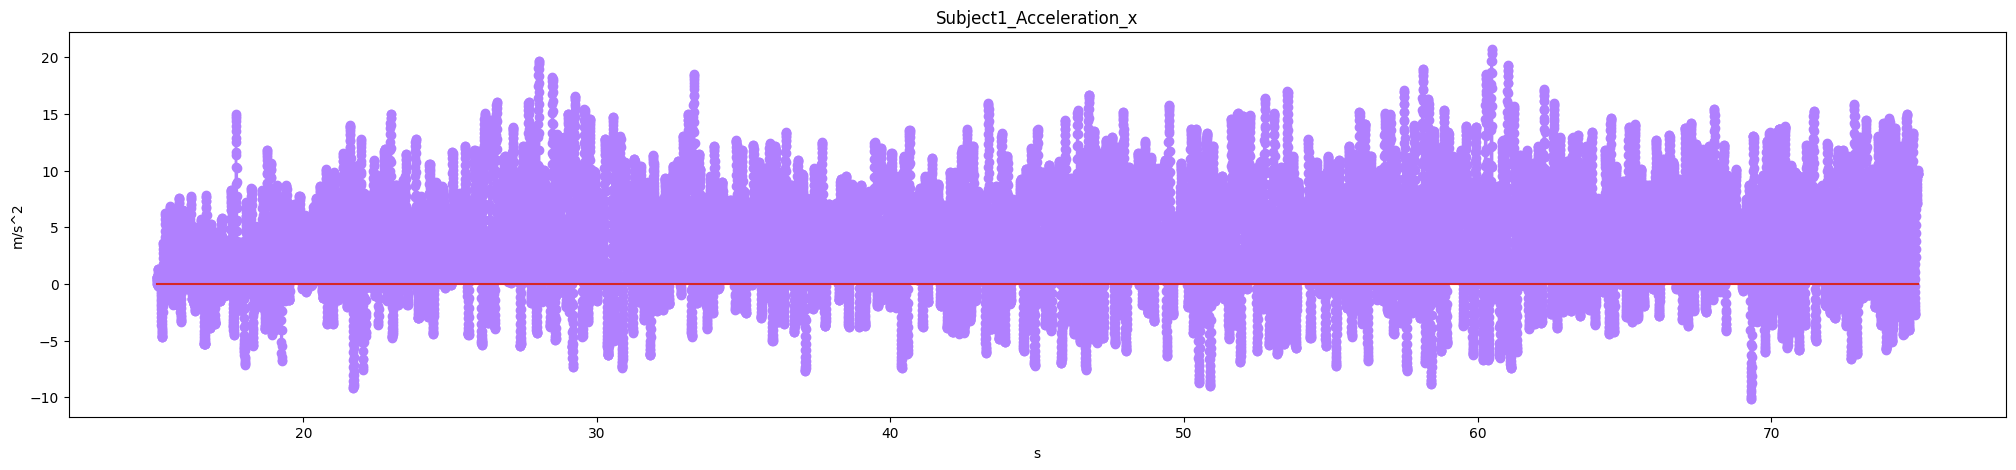

<Figure size 640x480 with 0 Axes>

In [8]:
plot_signals_save(signals['Subject1']['intense_tremor']['Time_(s)'],signals['Subject1']['intense_tremor']['Acceleration_x_(m/s^2)'],'Subject1_Acceleration_x')

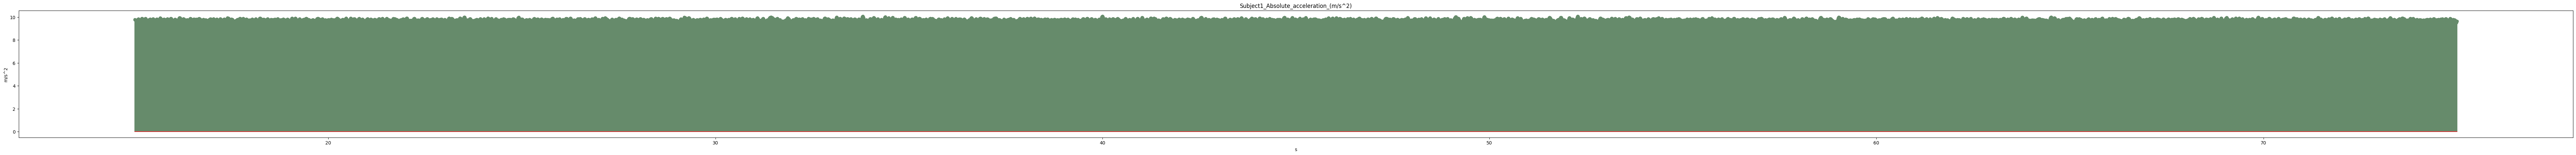

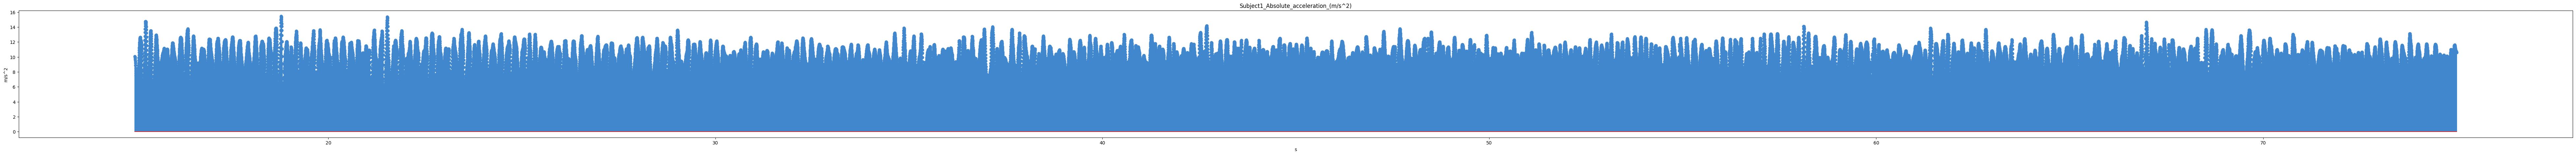

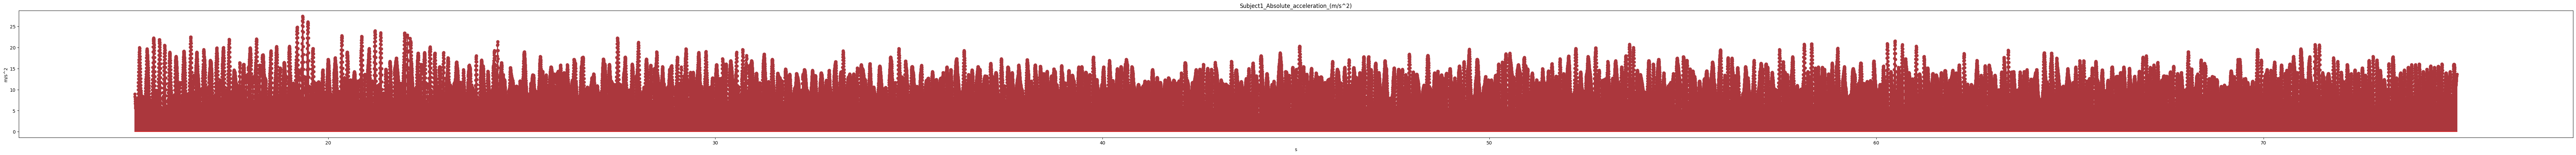

In [9]:
plot_signals(signals['Subject1']['stop']['Time_(s)'],signals['Subject1']['stop']['Absolute_acceleration_(m/s^2)'],'Subject1_Absolute_acceleration_(m/s^2)')
plot_signals(signals['Subject1']['light_tremor']['Time_(s)'],signals['Subject1']['light_tremor']['Absolute_acceleration_(m/s^2)'],'Subject1_Absolute_acceleration_(m/s^2)')
plot_signals(signals['Subject1']['intense_tremor']['Time_(s)'],signals['Subject1']['intense_tremor']['Absolute_acceleration_(m/s^2)'],'Subject1_Absolute_acceleration_(m/s^2)')

In [10]:
def PSD(chanels:list,text:str, ch:int, fs:float):
  s = chanels
  (f, S) = signal.periodogram(s, fs, scaling='density')
  fig = plt.figure(figsize=(100,5))
  plt.subplot(1,4,ch, title=text)
  plt.semilogy(f, S)
  #plt.ylim([1e-7, 1e2])
  plt.xlim([0,210])
  plt.xlabel('frequency [Hz]')
  plt.ylabel('PSD [V**2/Hz]')
  plt.vlines(x=206,ymin = 0, ymax = 1e2, colors = 'r')
  plt.show()

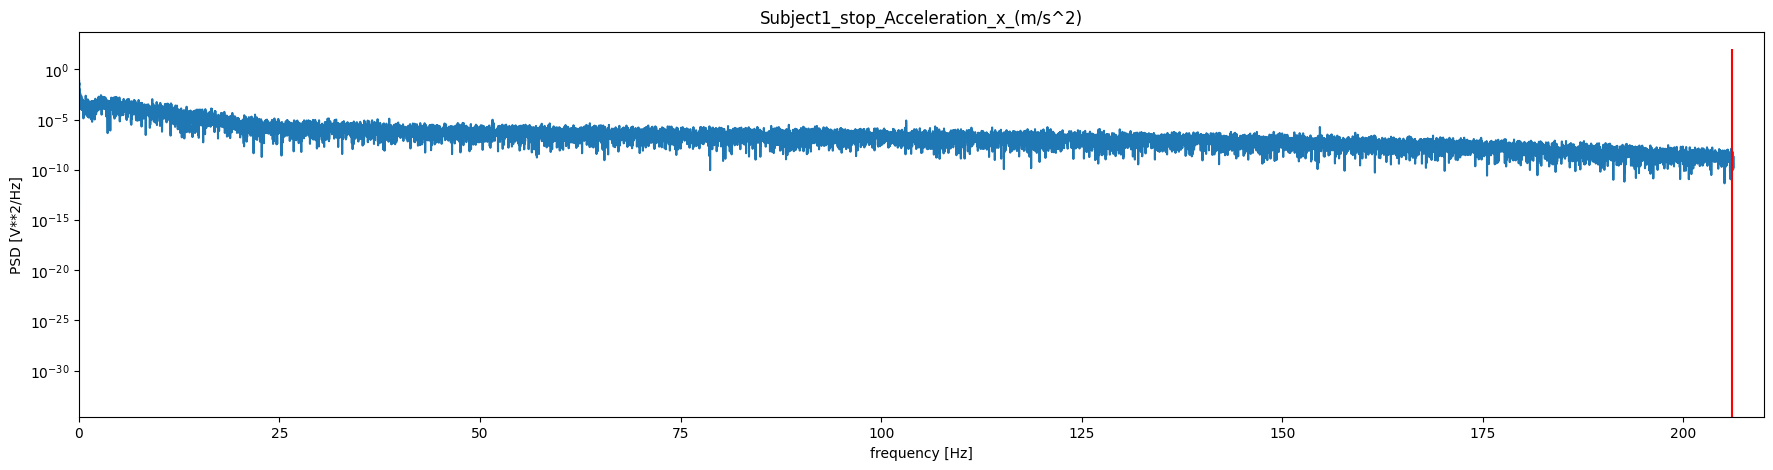

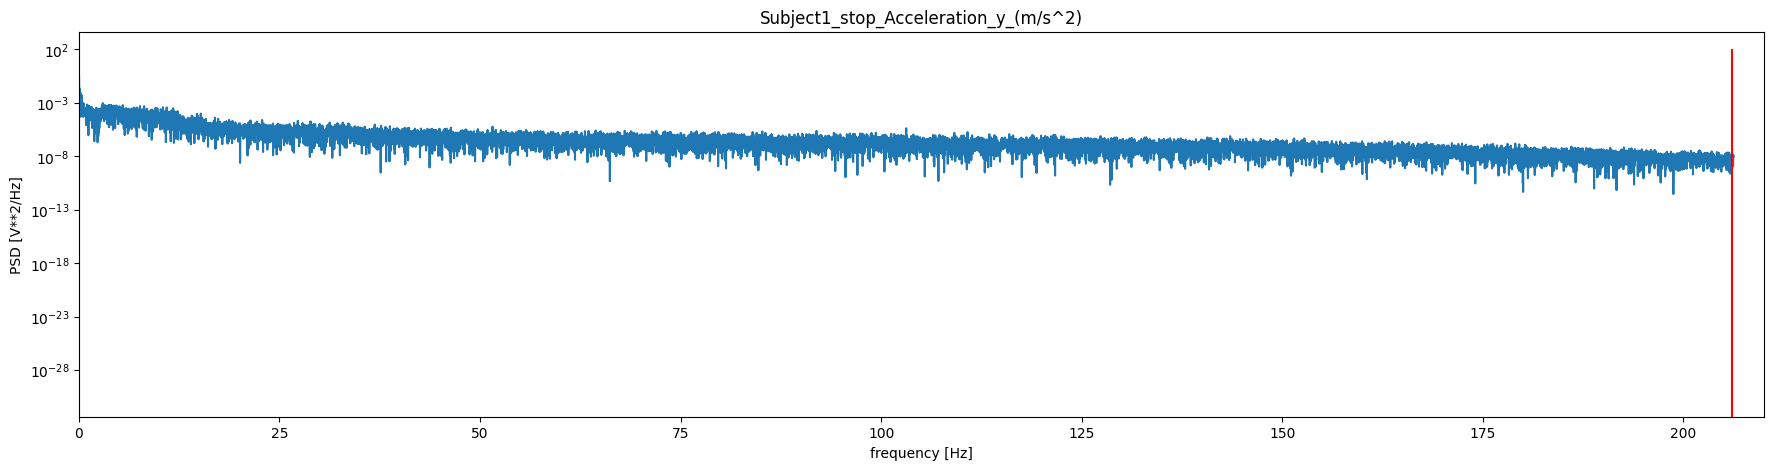

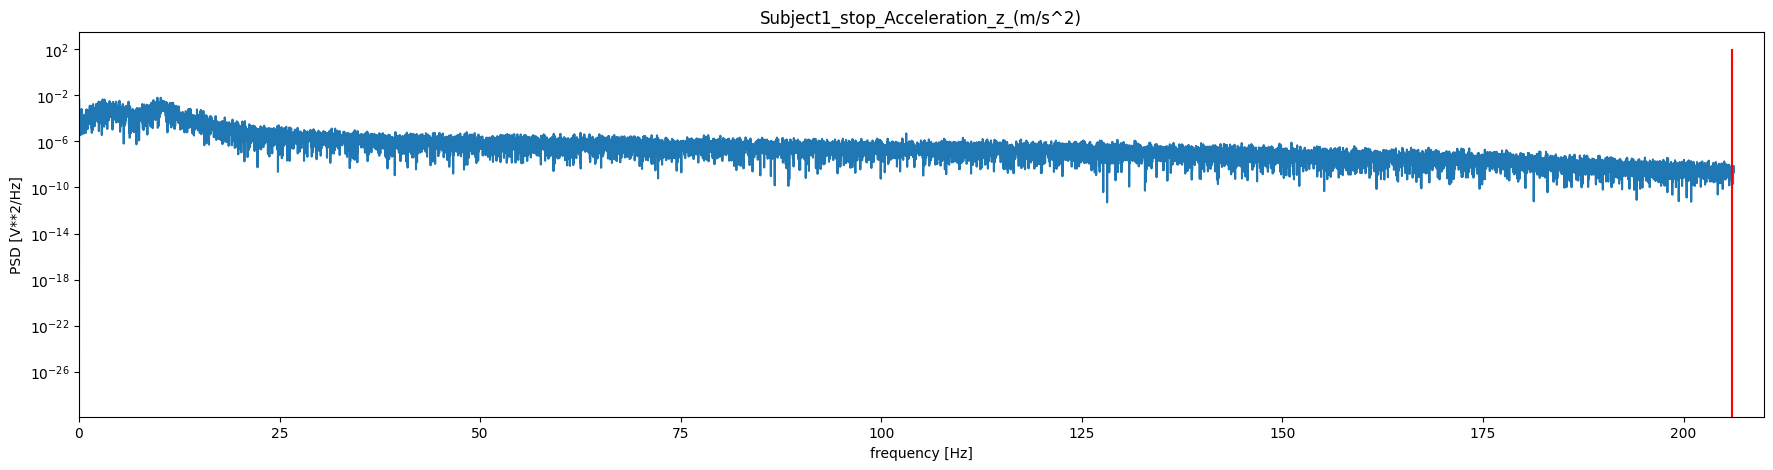

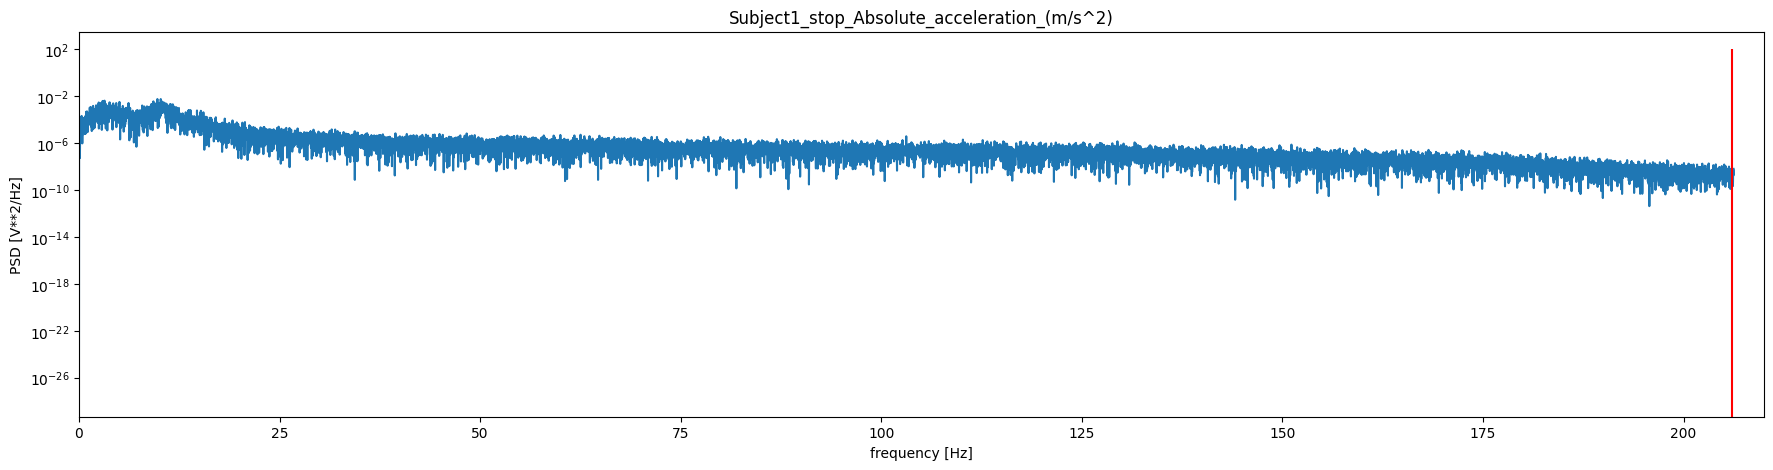

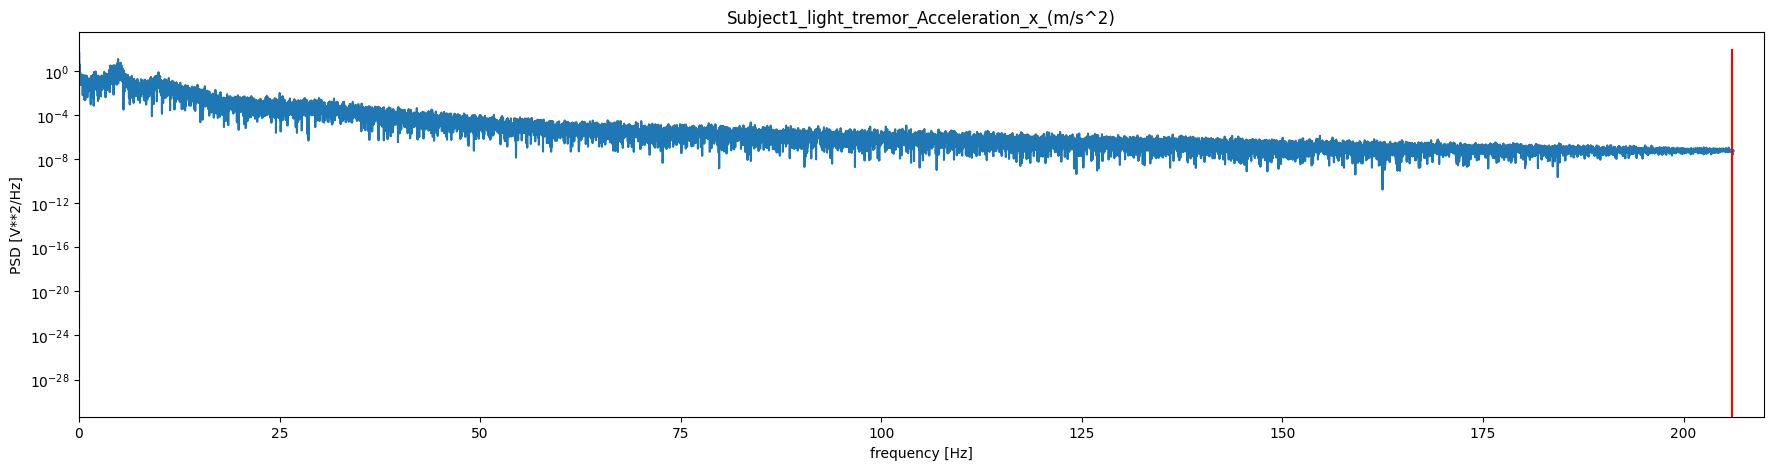

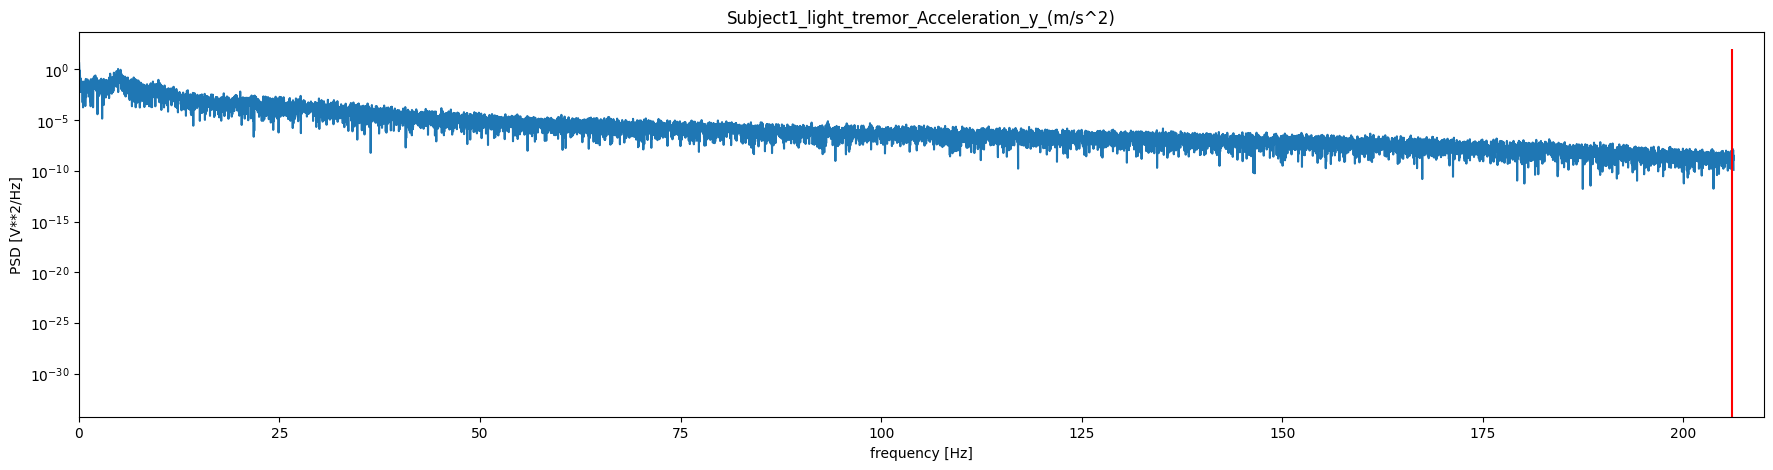

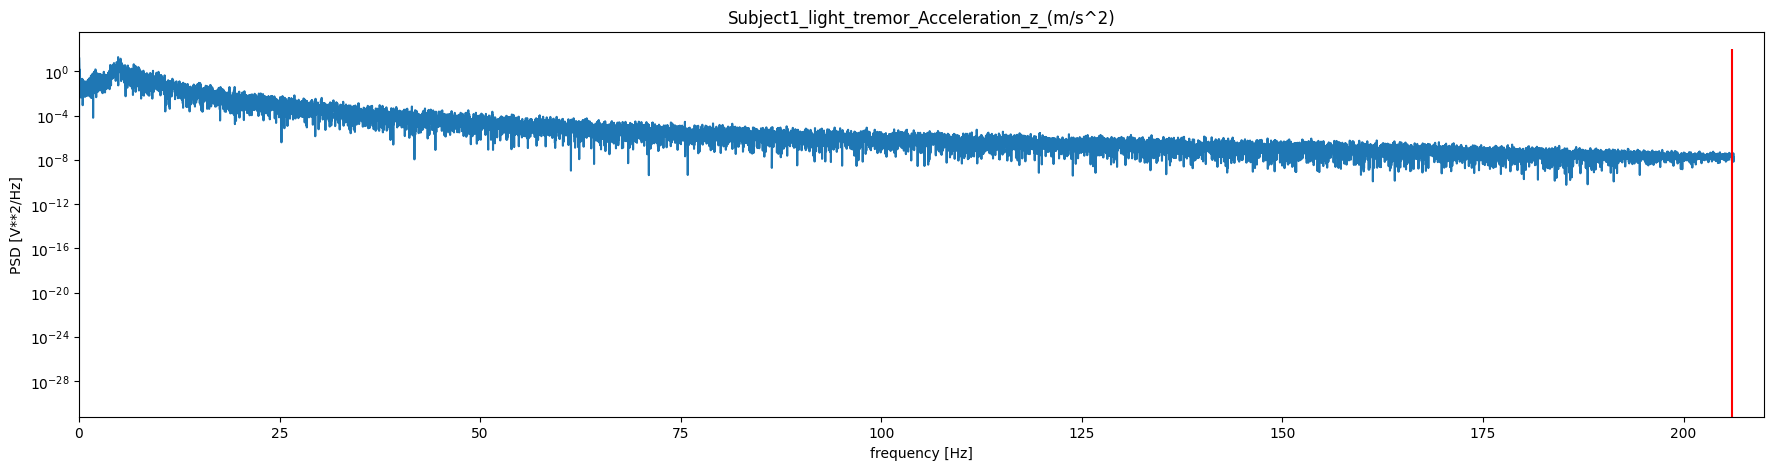

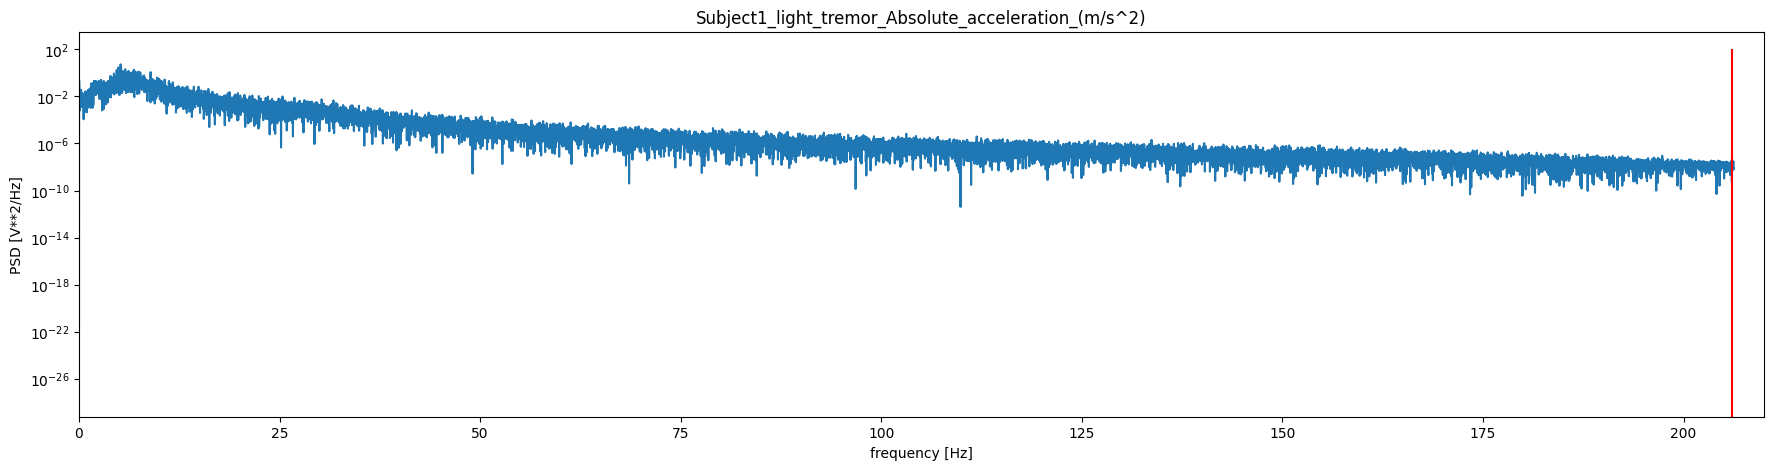

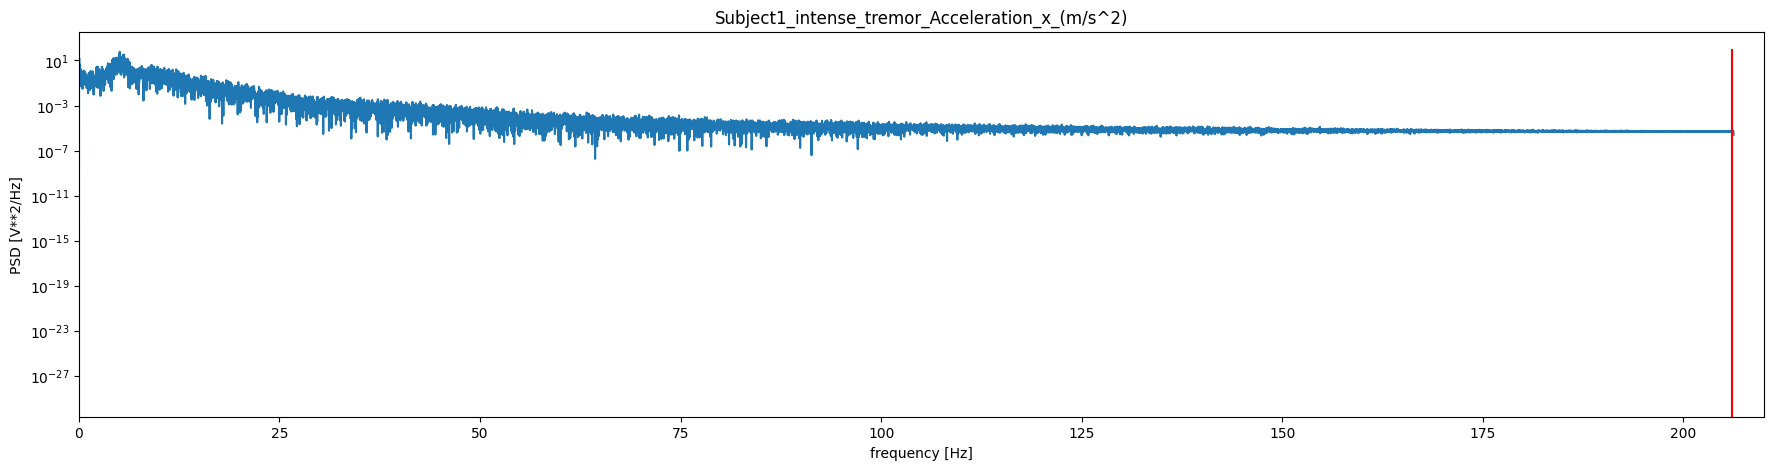

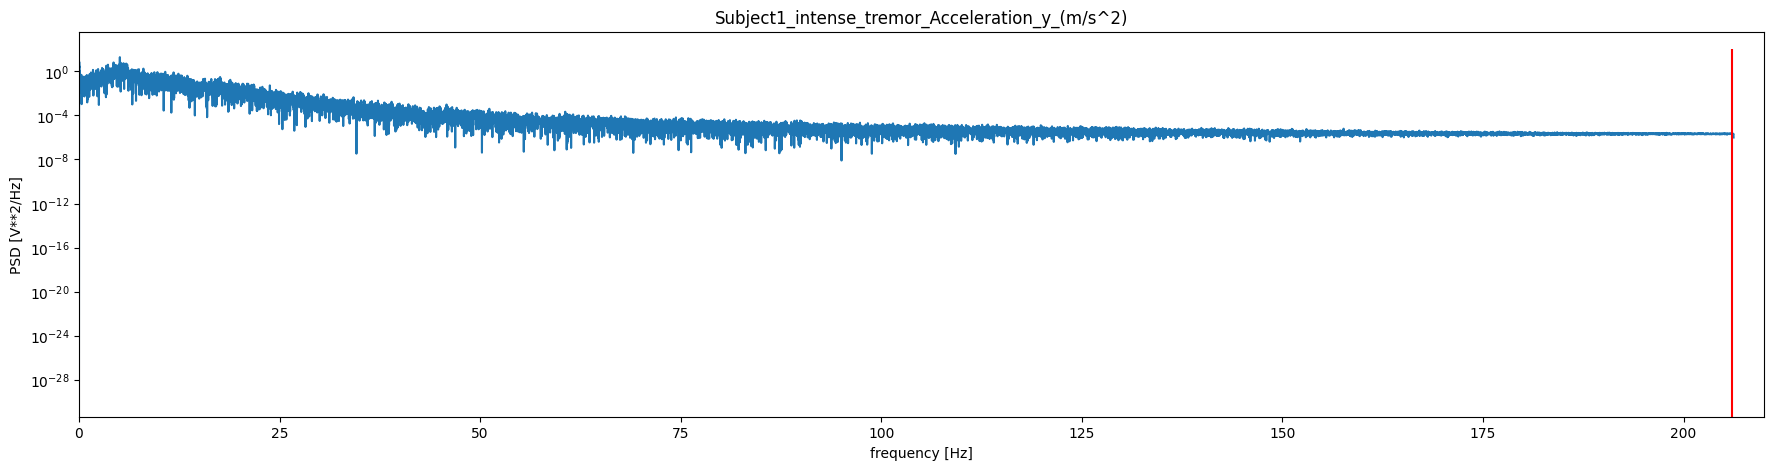

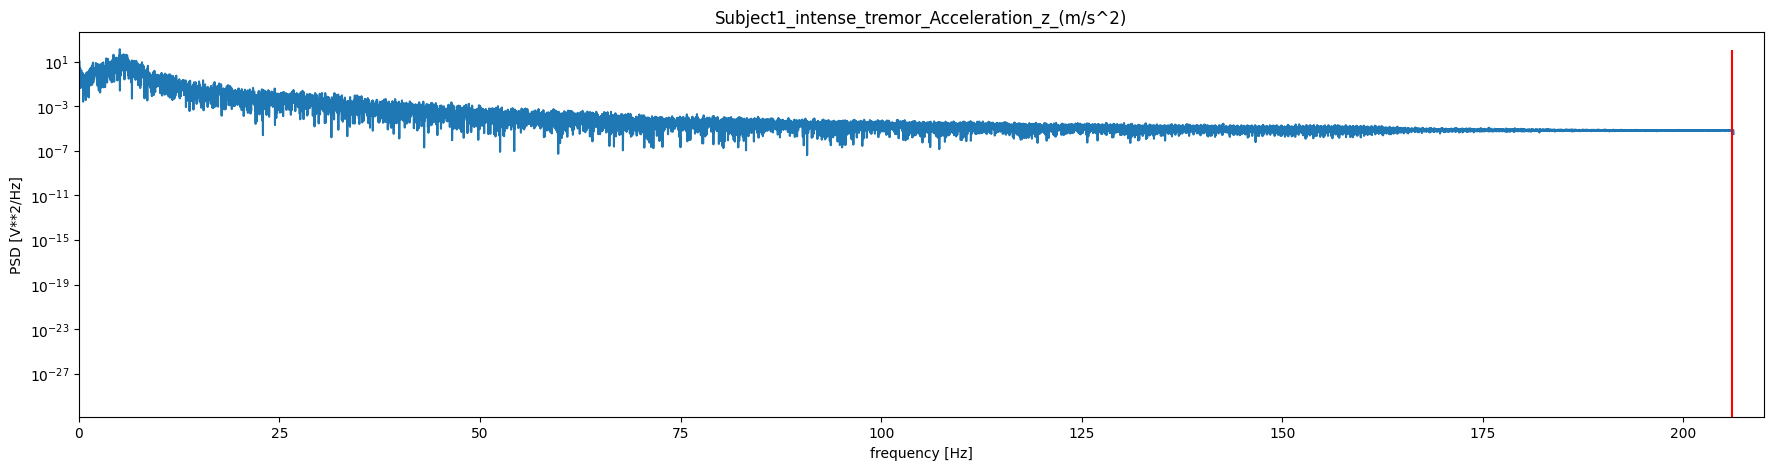

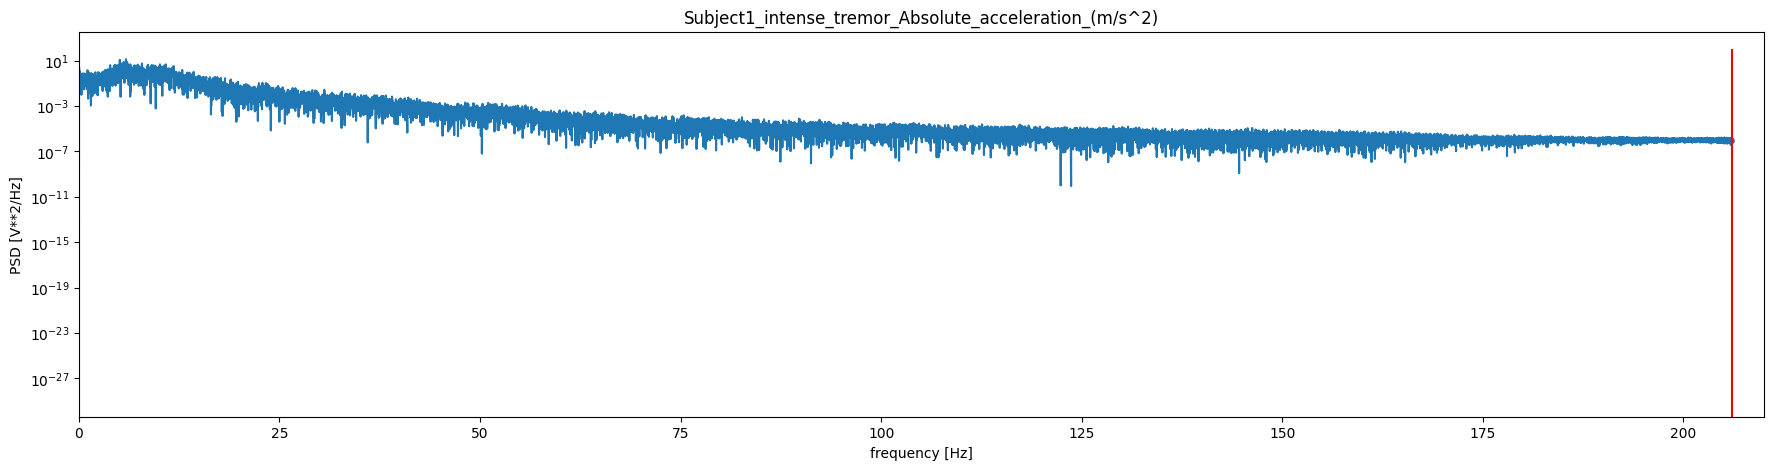

In [11]:
# Aplicamos a PSD para descobrir a faixa de frequência que recebe contribuição das componentes do sinal

for i,j in signals['Subject1'].items():
  for k,l,m in zip(j.keys(),j.values(),range(5)):
    if m!=0:
      PSD(l,'Subject1_'+i+'_'+k,m,fs[0])

In [12]:
def TFTD(chanels:list,text:str,k:int):
  fhz = np.linspace(-206,206,len(chanels)) ##intervalo de frequências validado pela PSD
  Xtf = fftpack.fftshift(fftpack.fft(chanels))
  f = plt.figure(figsize=(200,5))
  plt.subplot(1,4,k, title='Módulo_da_Transformada_Discreta_de_Fourier_'+text)
  plt.xlabel("Hz")
  plt.ylabel("TFTD")
  plt.plot(fhz, abs(Xtf), 'b')
  plt.show()
     


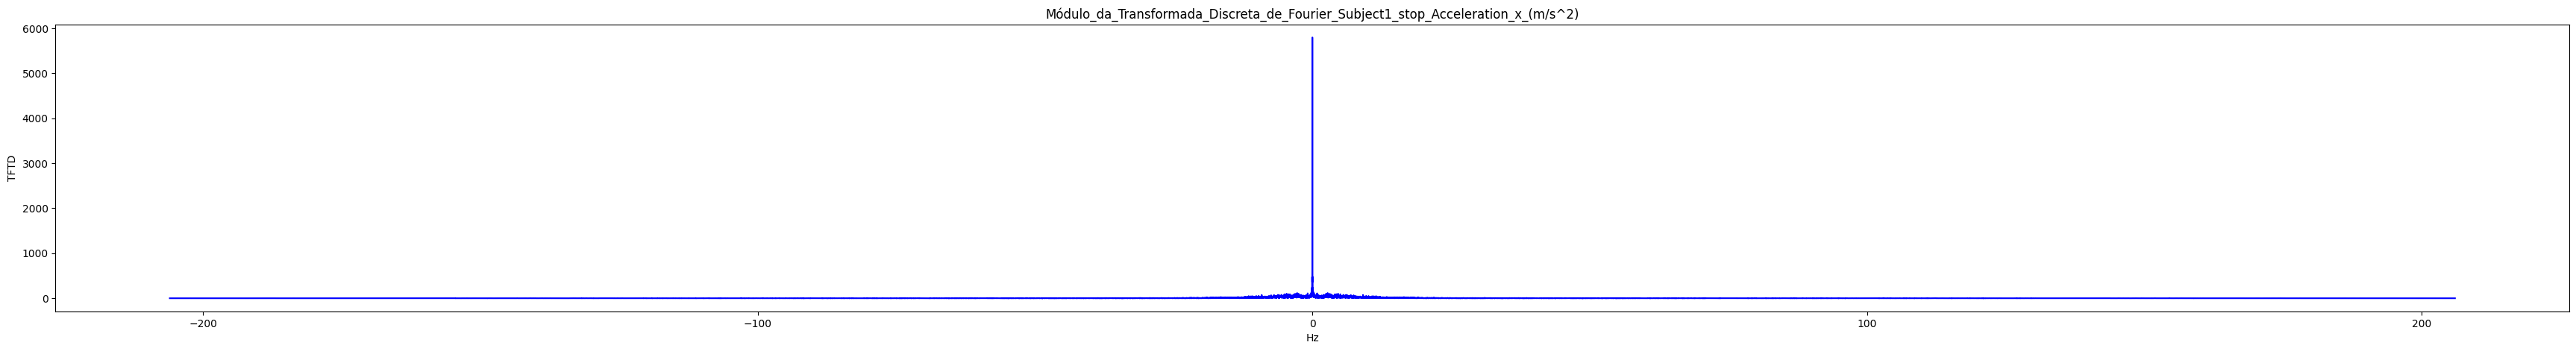

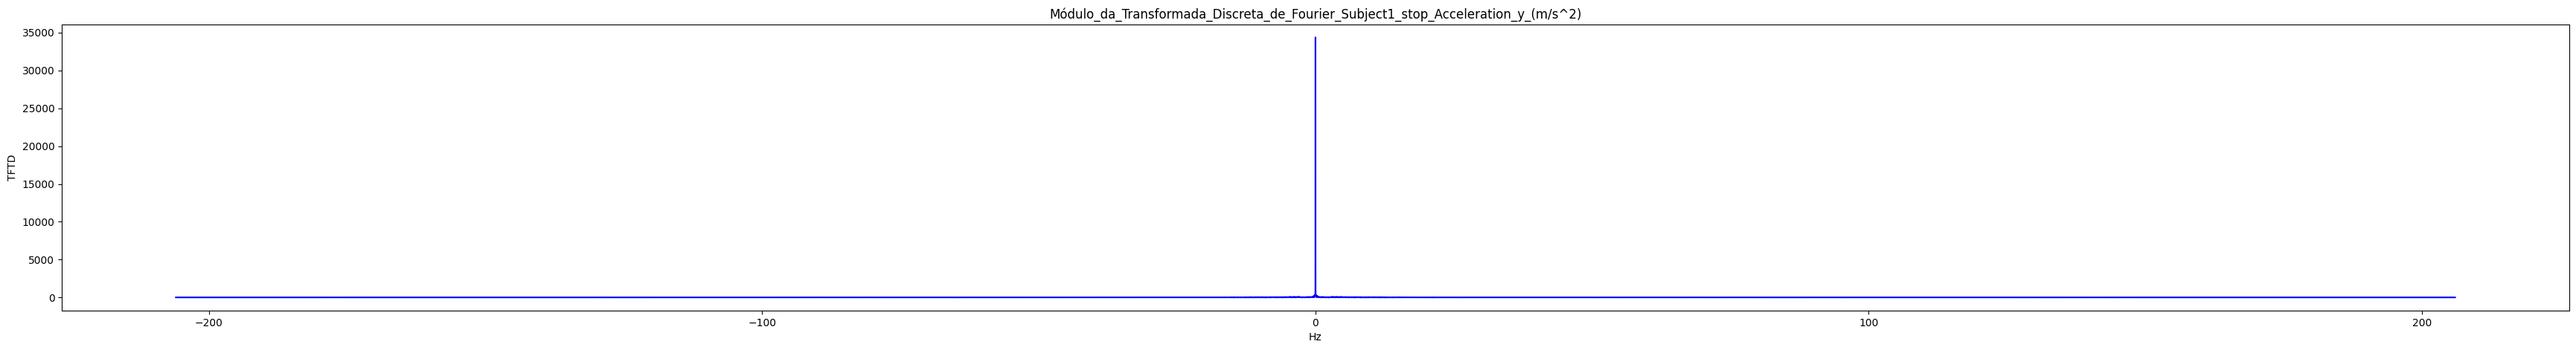

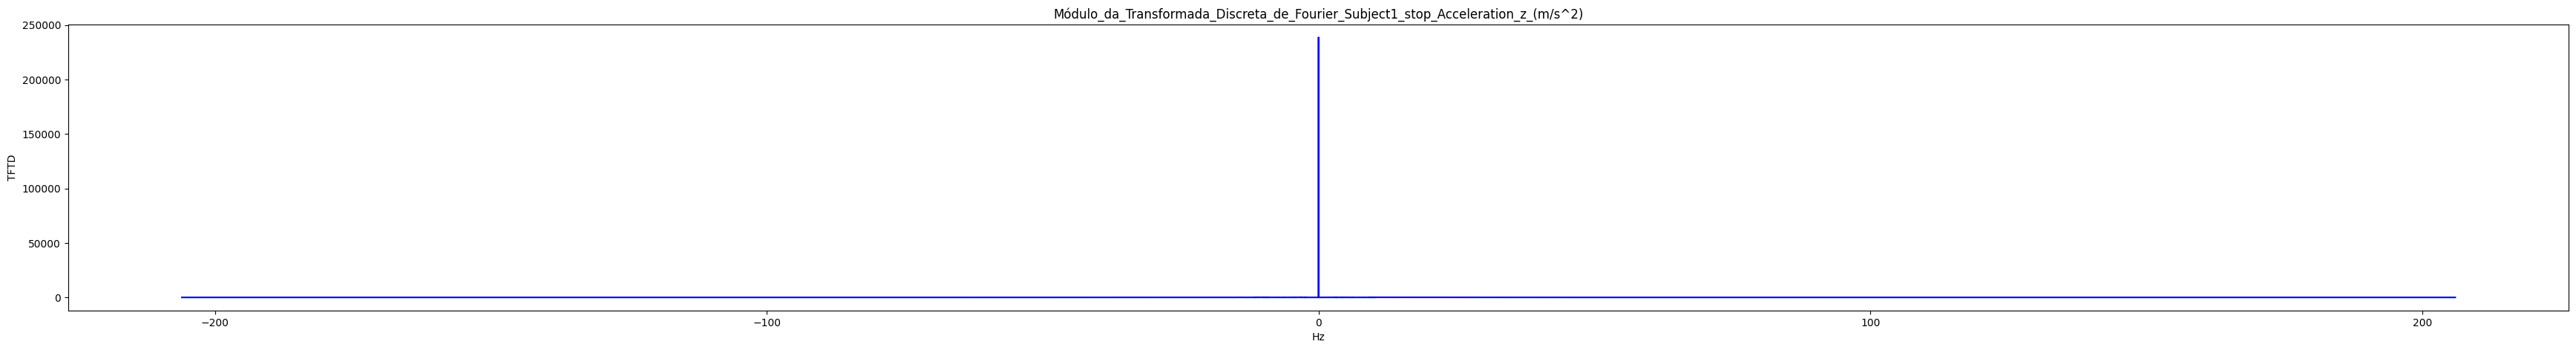

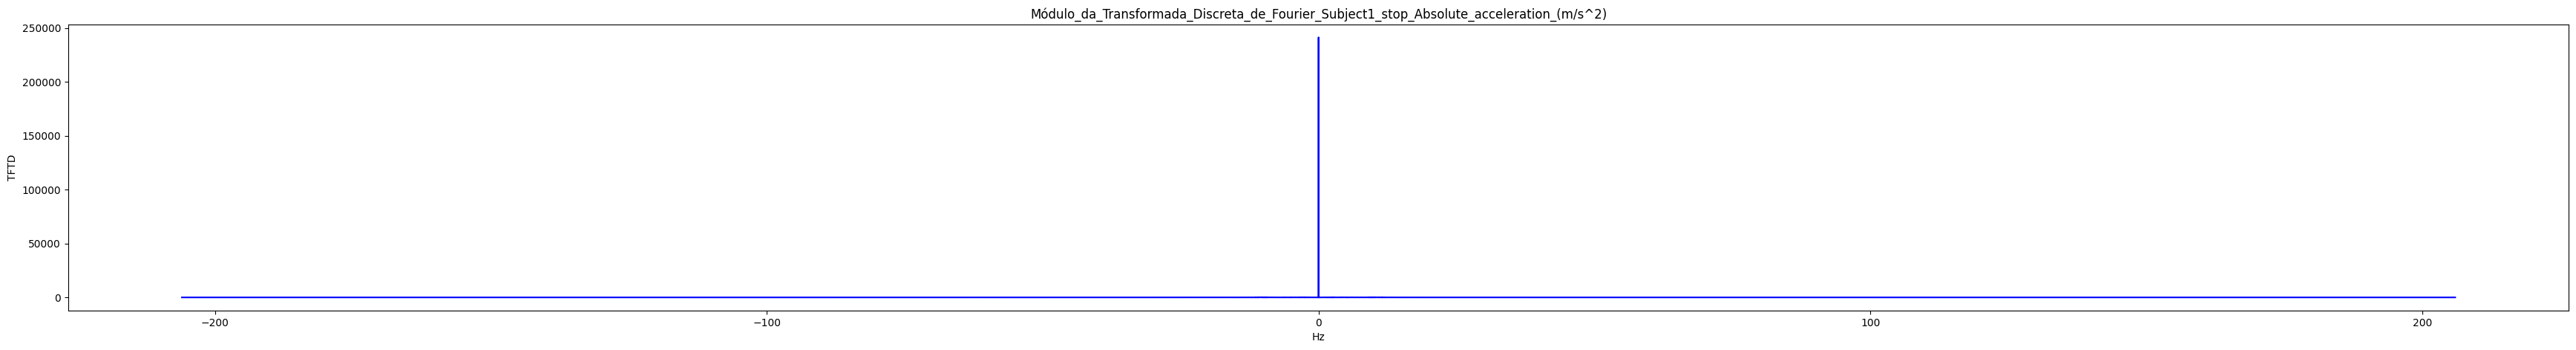

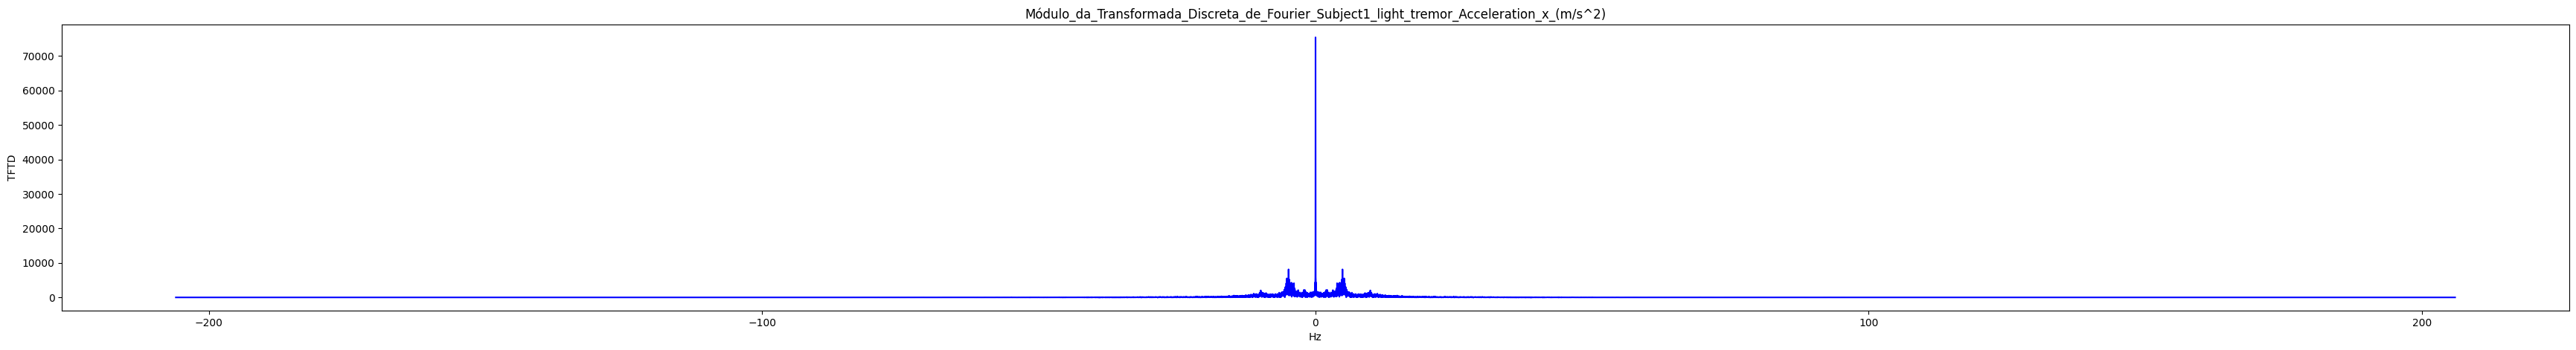

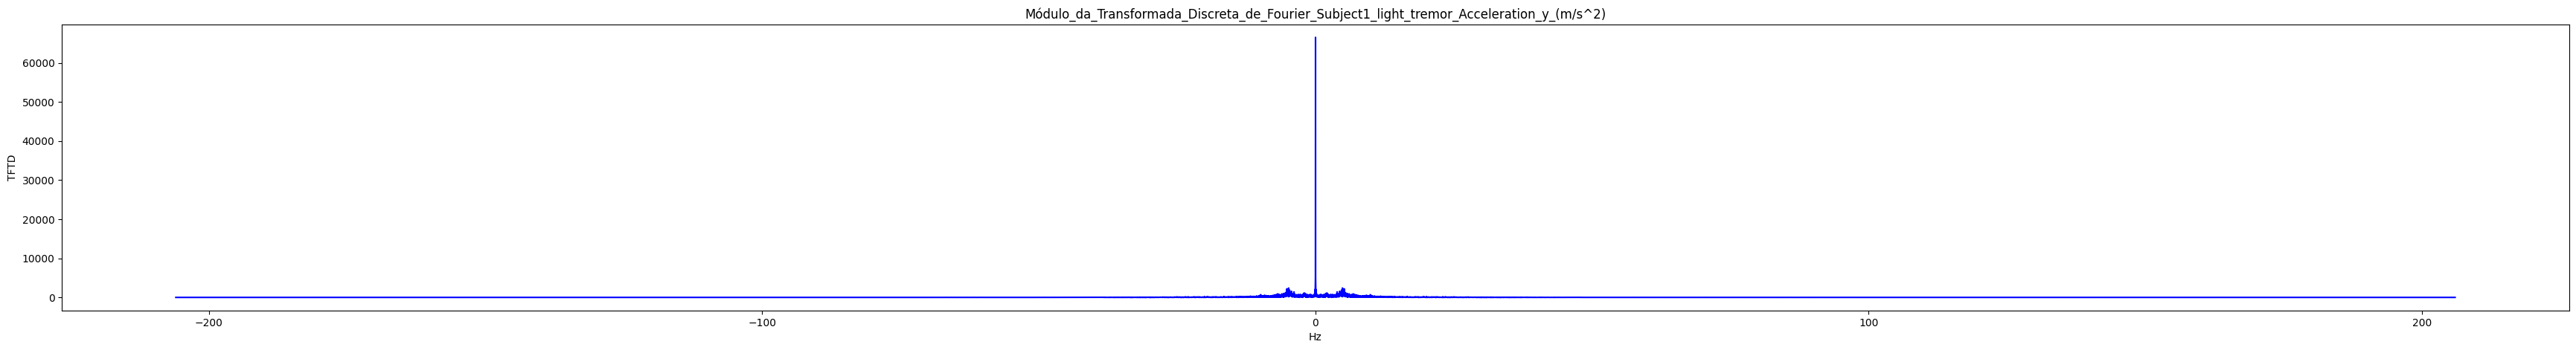

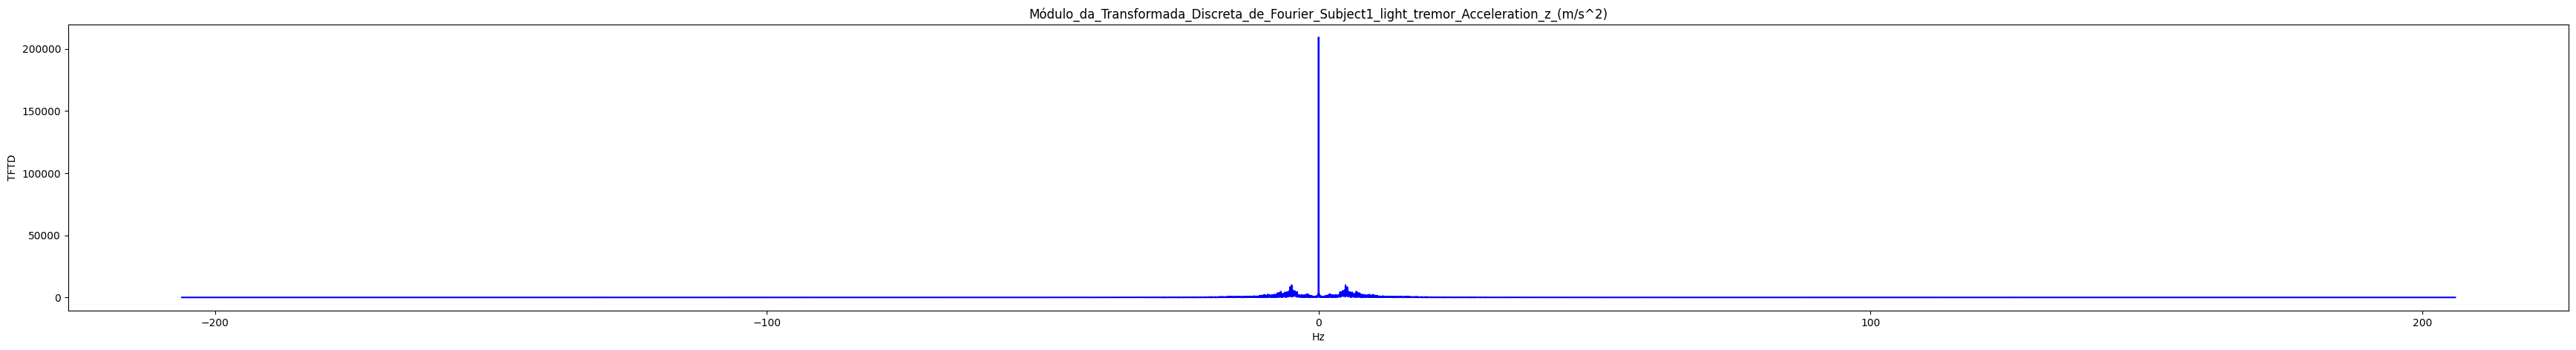

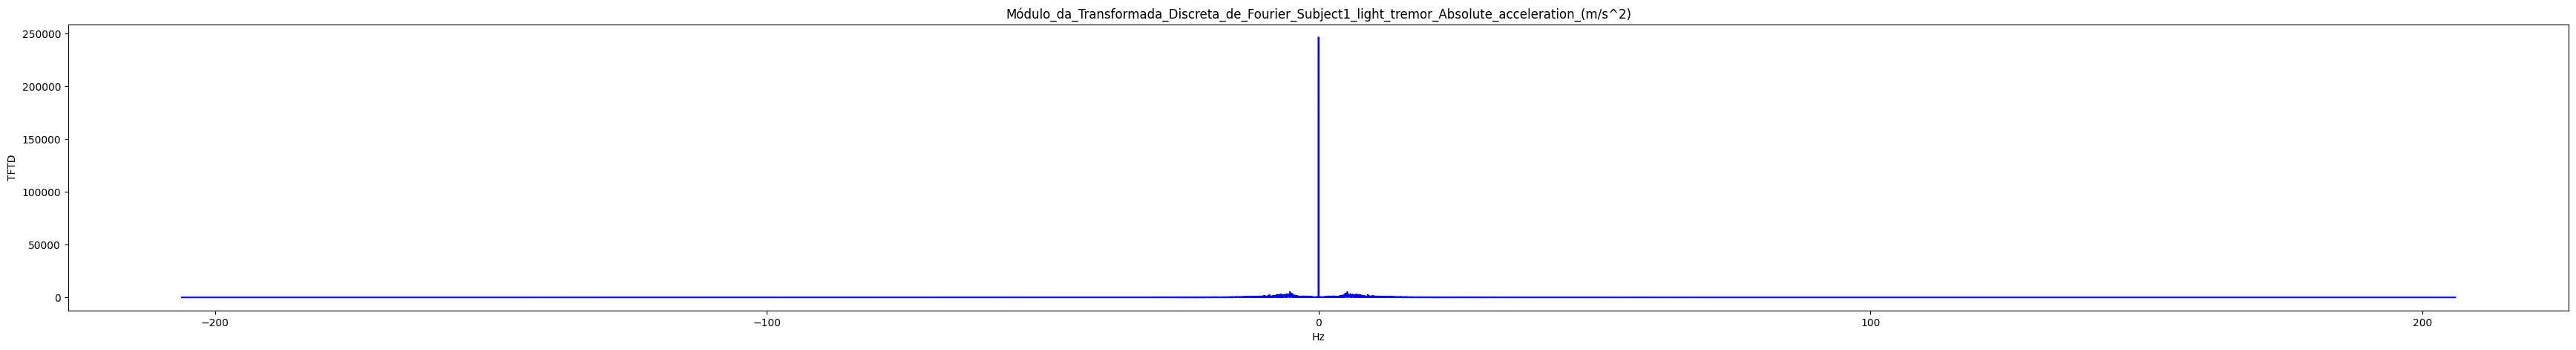

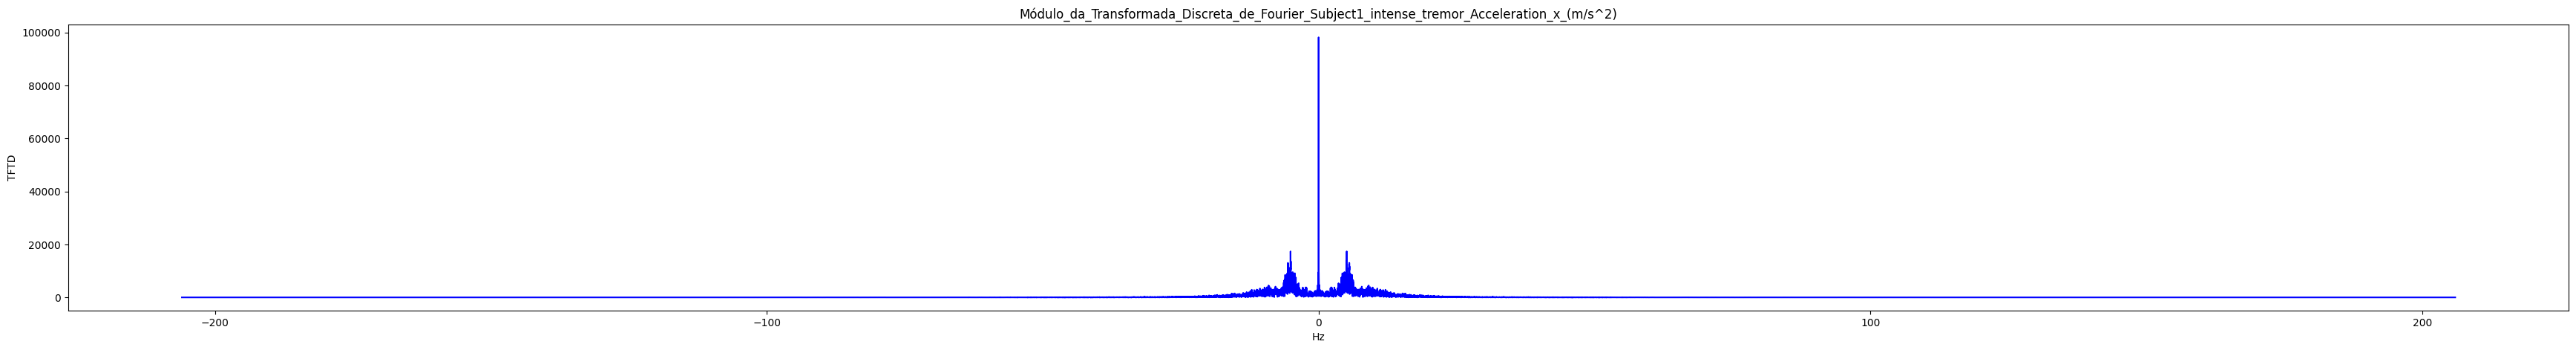

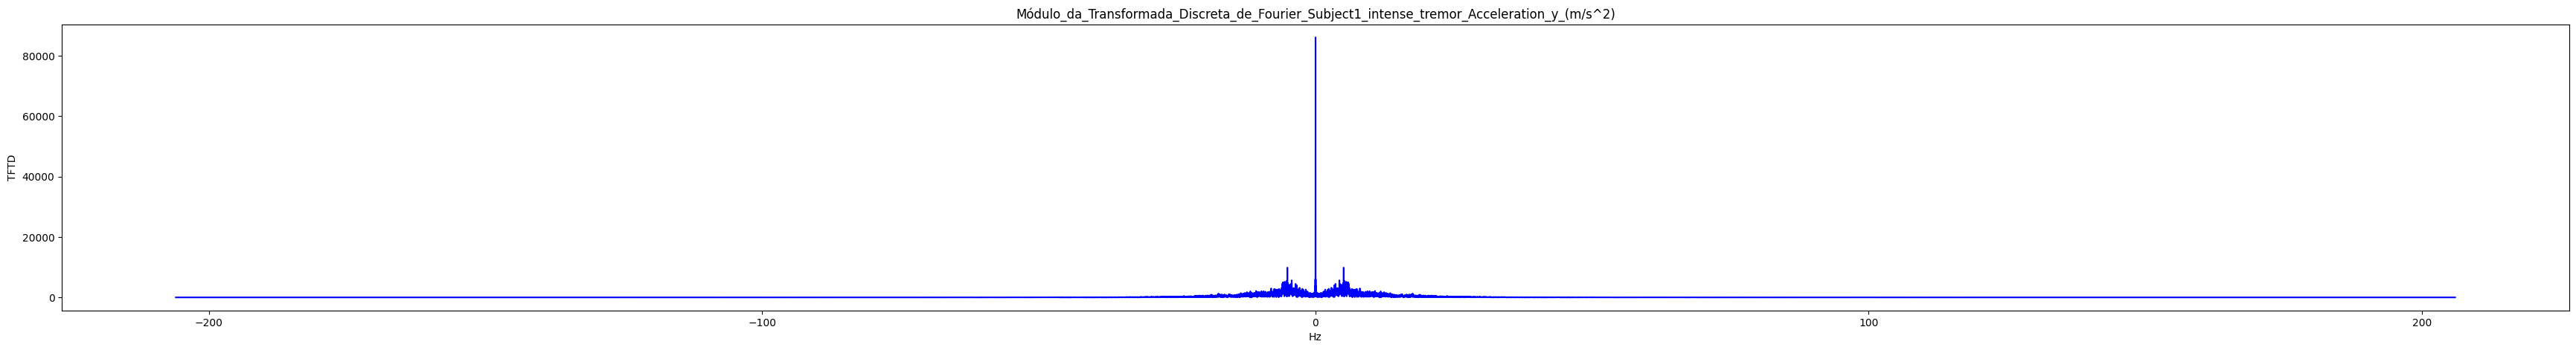

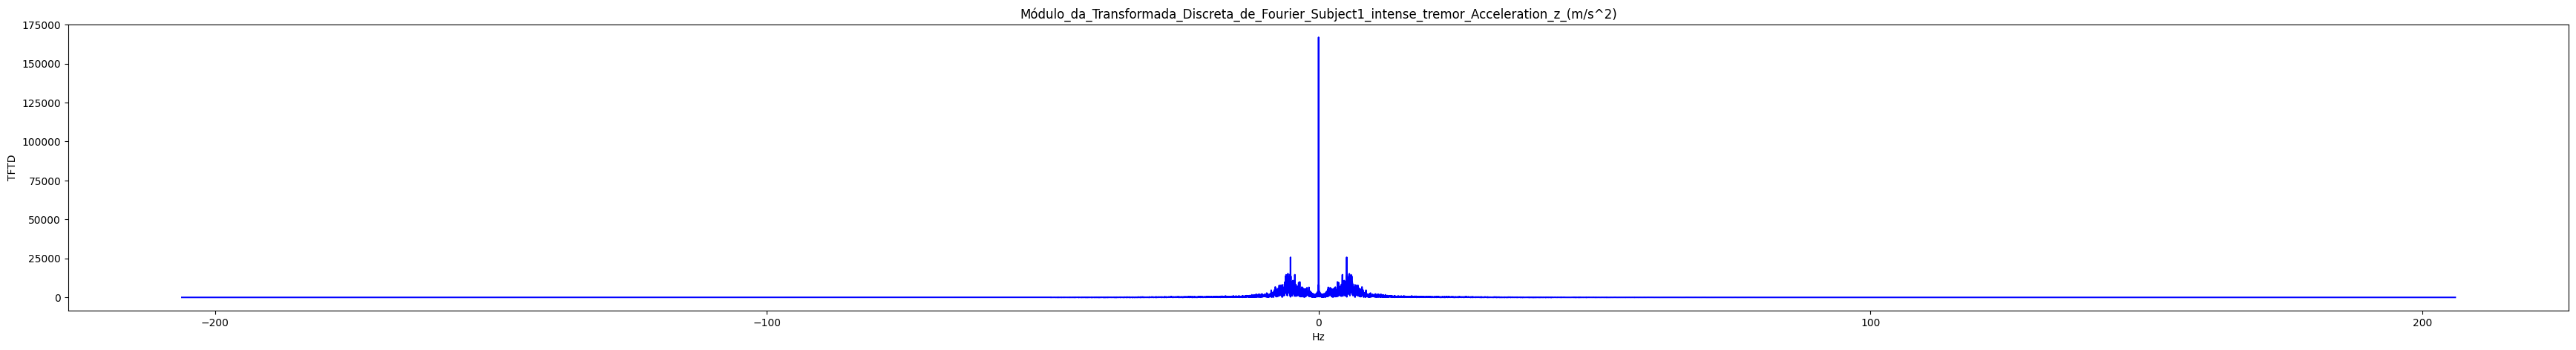

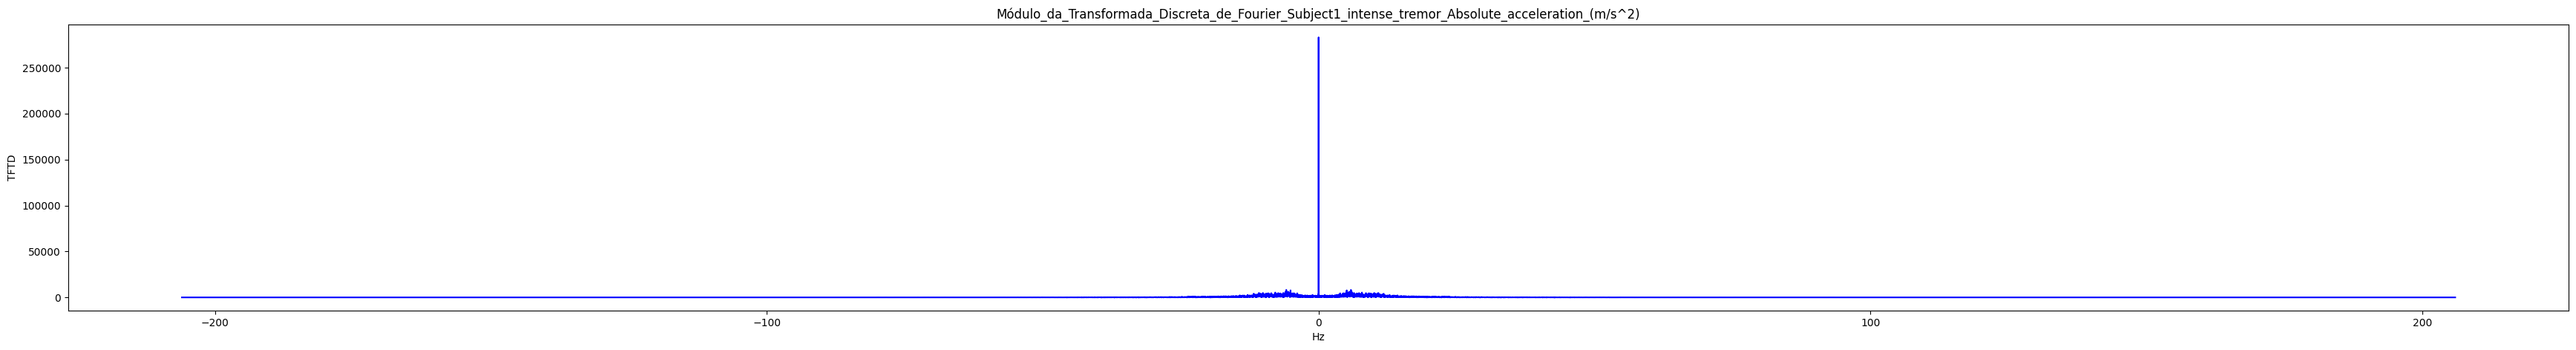

In [13]:
for i,j in signals['Subject1'].items():
  for k,l,m in zip(j.keys(),j.values(),range(5)):
    if m!=0:
      TFTD(l,'Subject1_'+i+'_'+k,m)

É possível notar através dos espectros das funções que a banda do sinal é cerca de 20Hz a cada sessão. Ademais, vai ser realizada a avaliação para janelas de 1s.

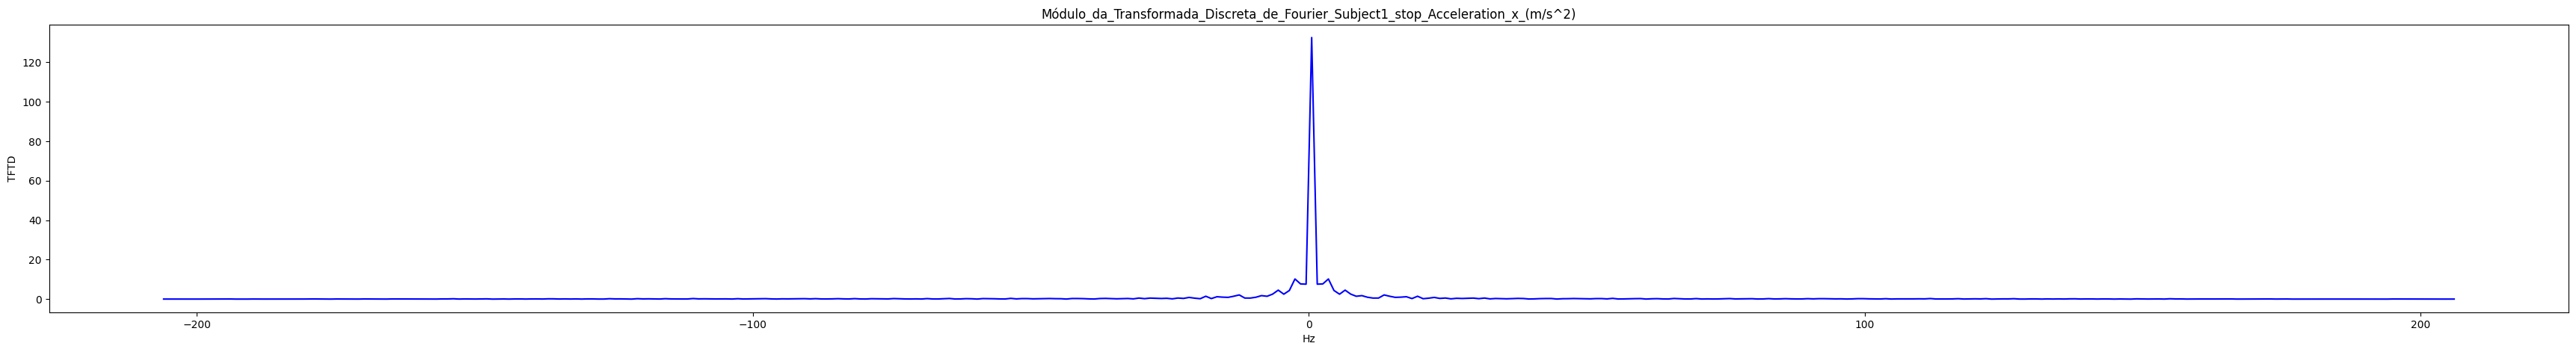

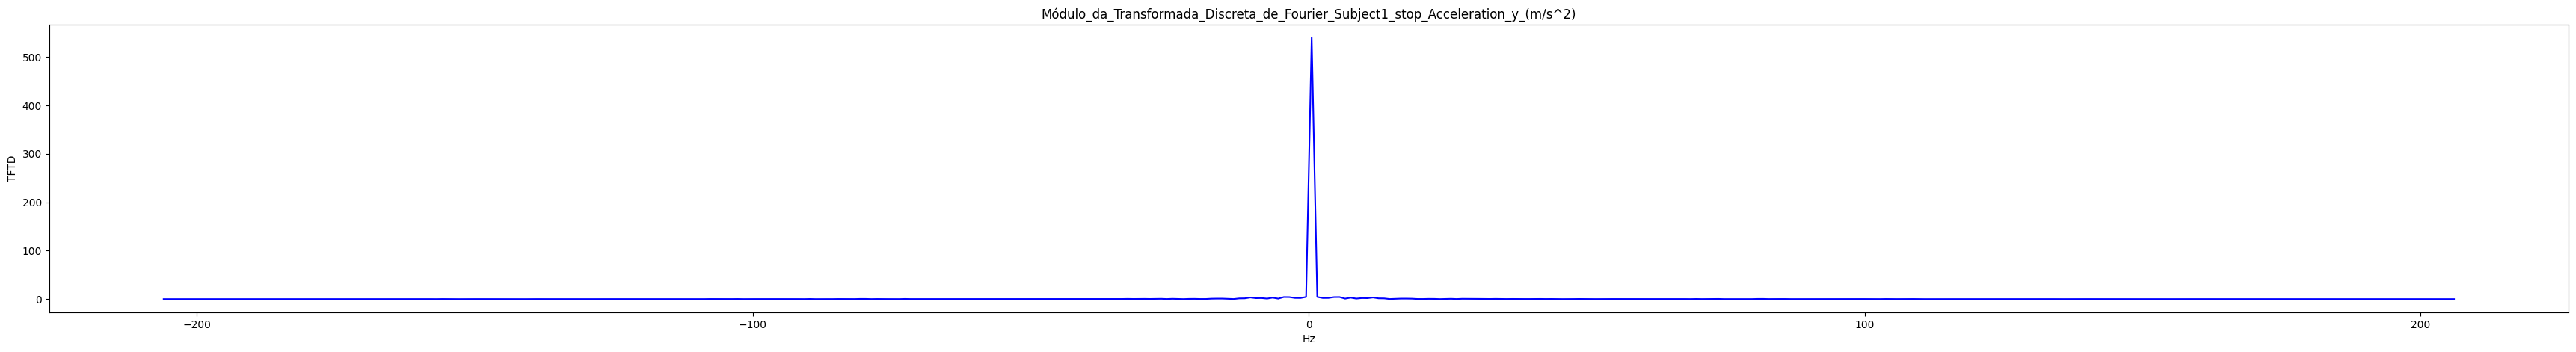

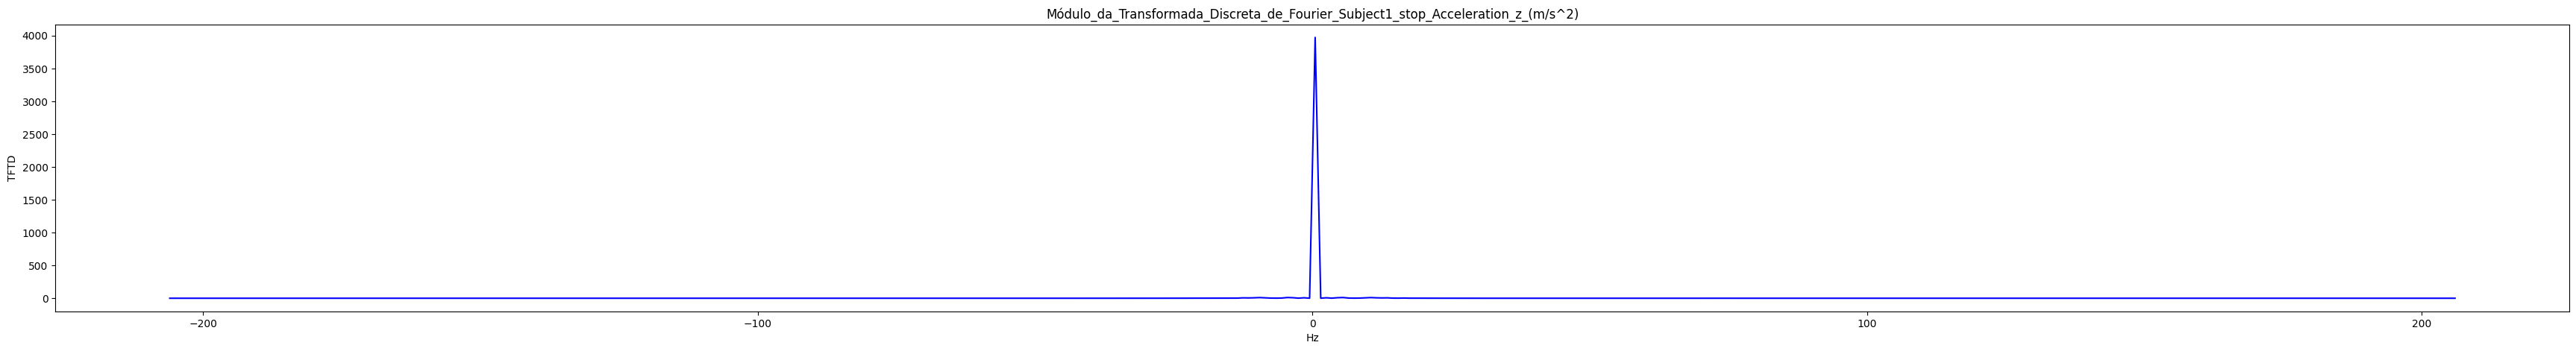

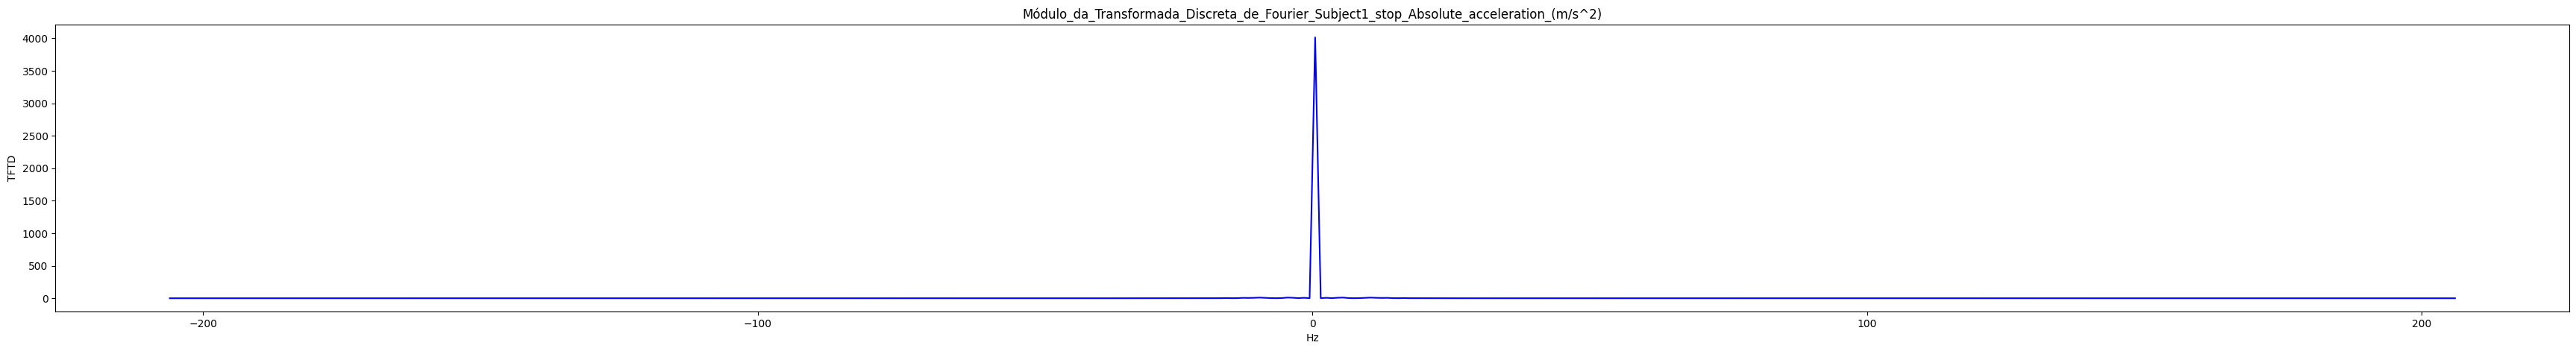

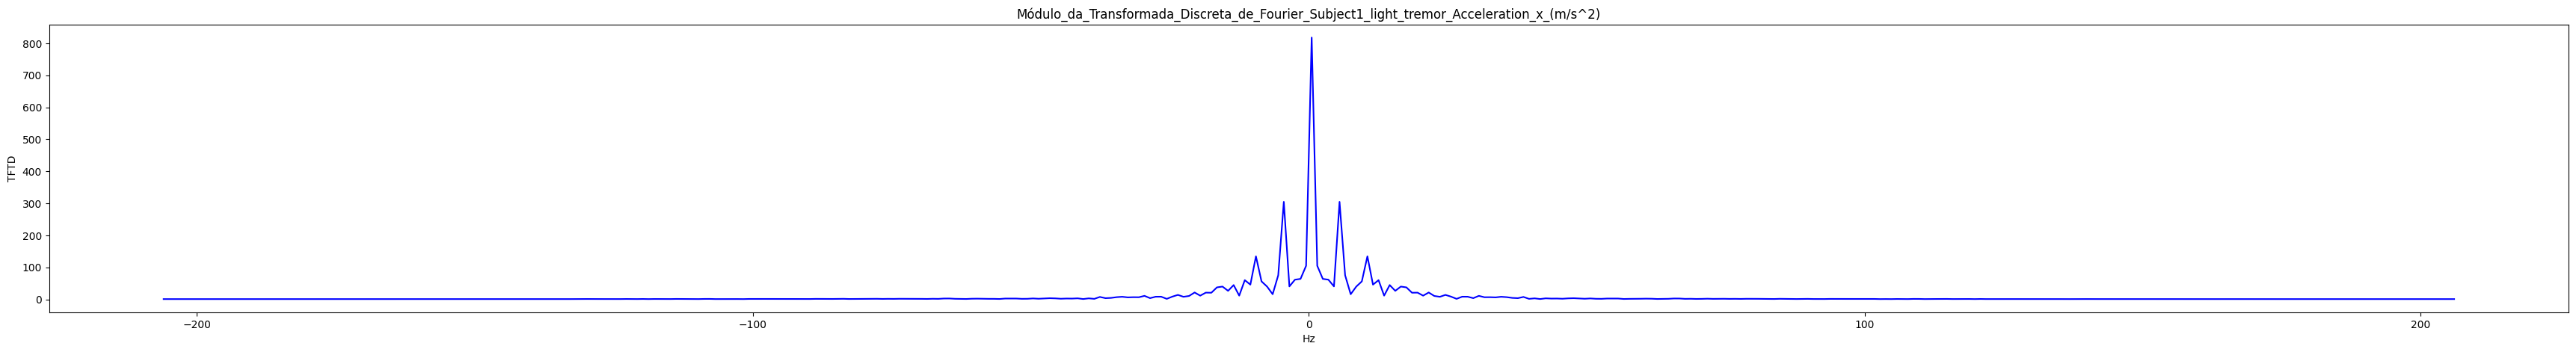

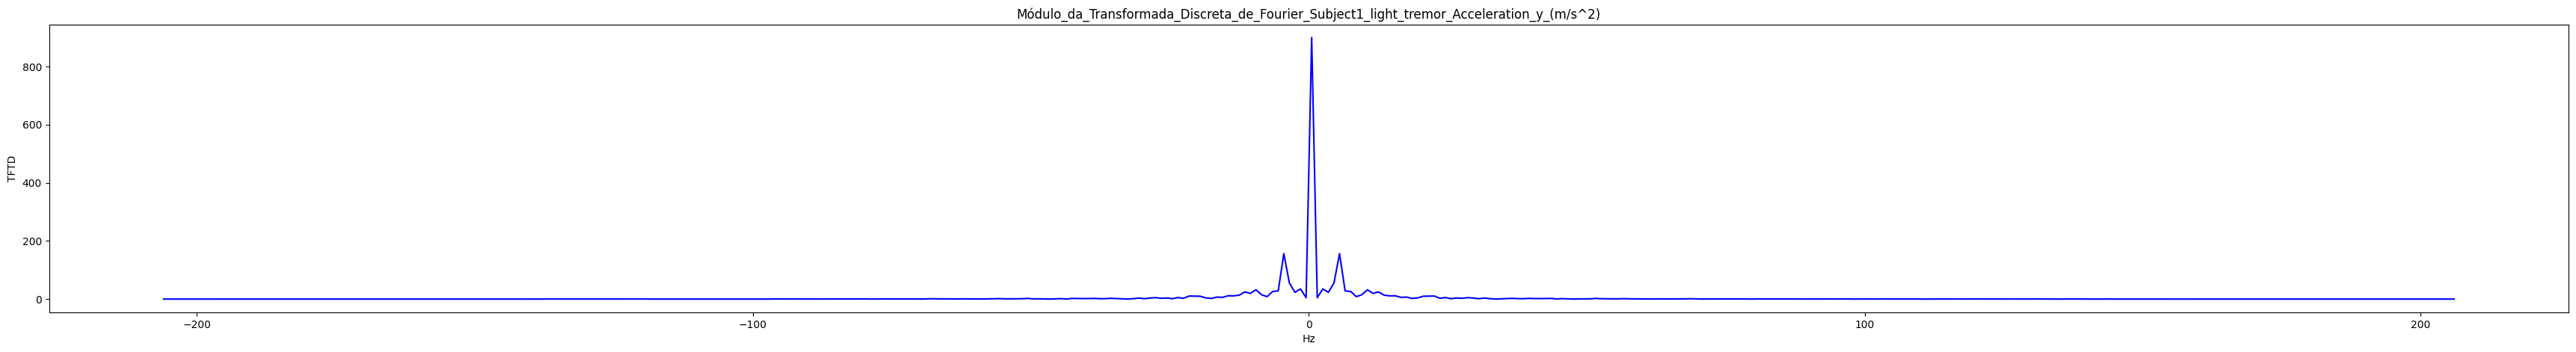

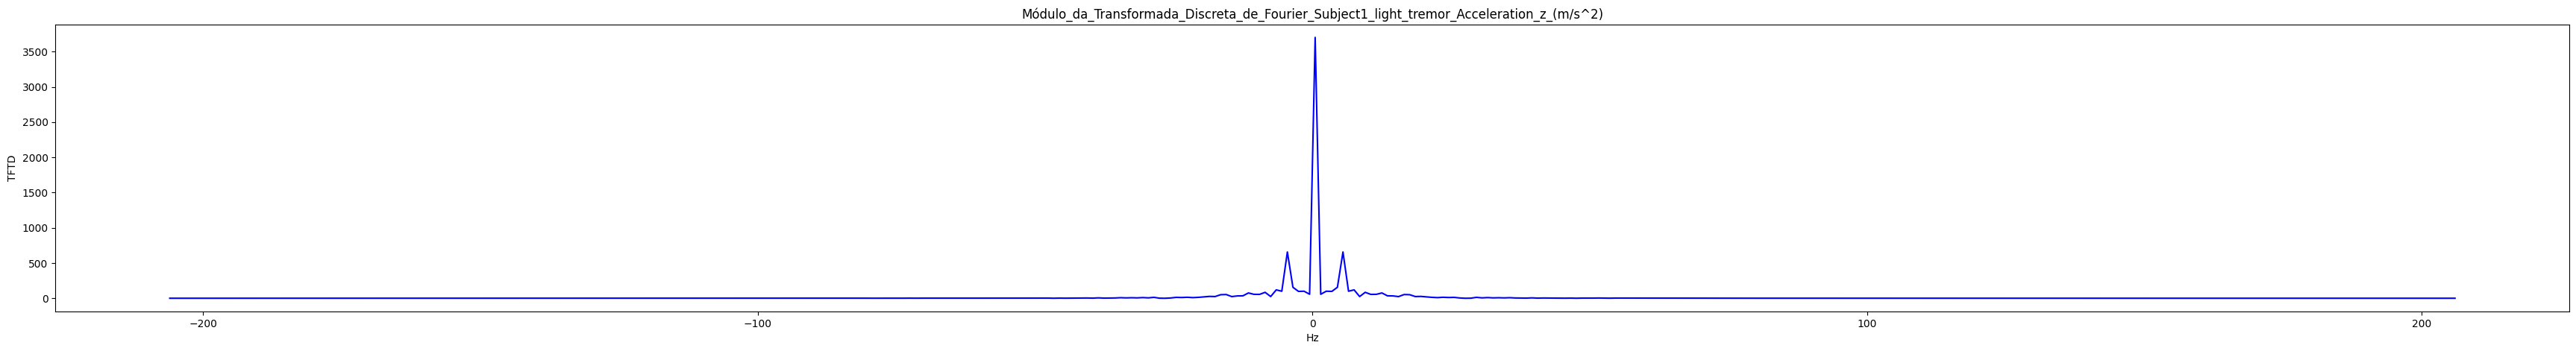

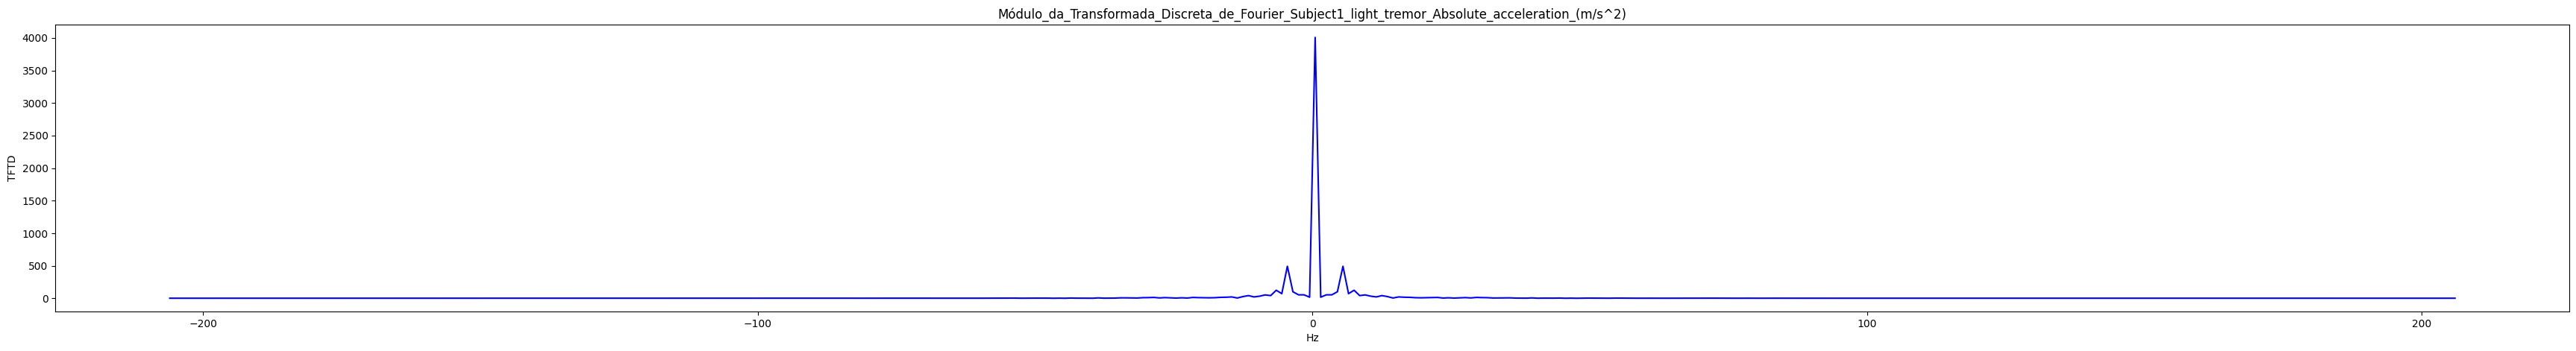

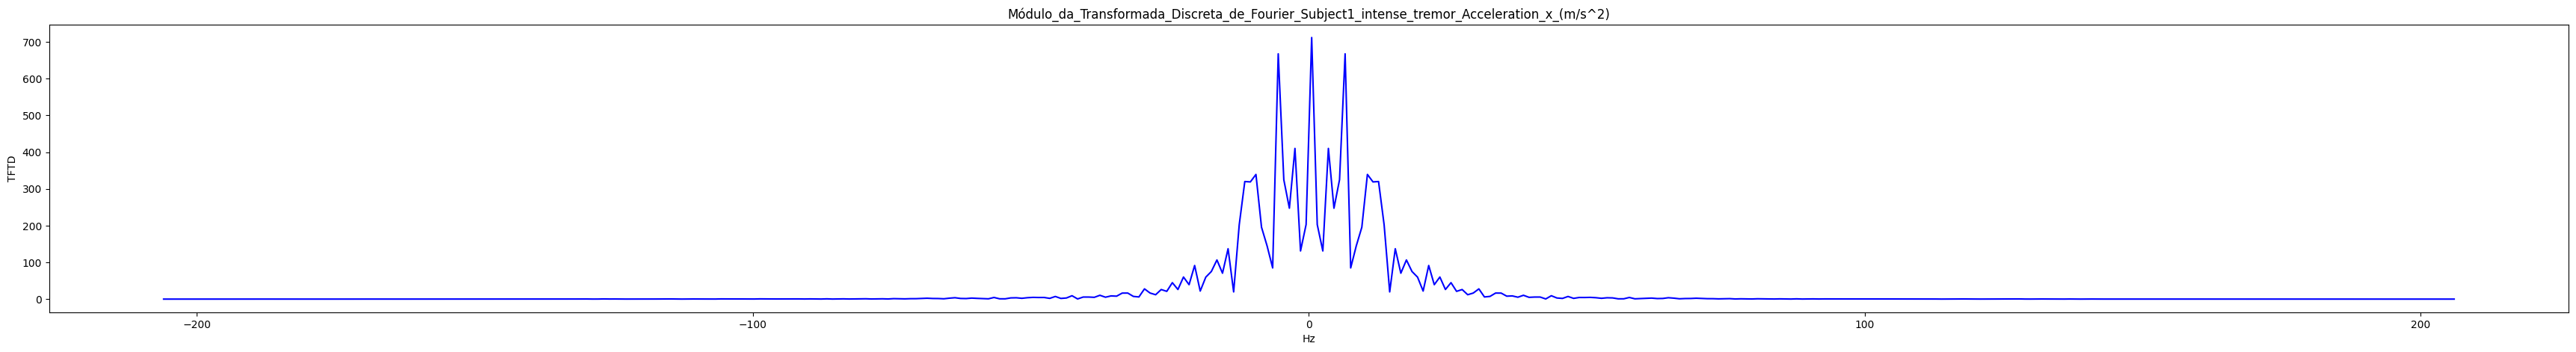

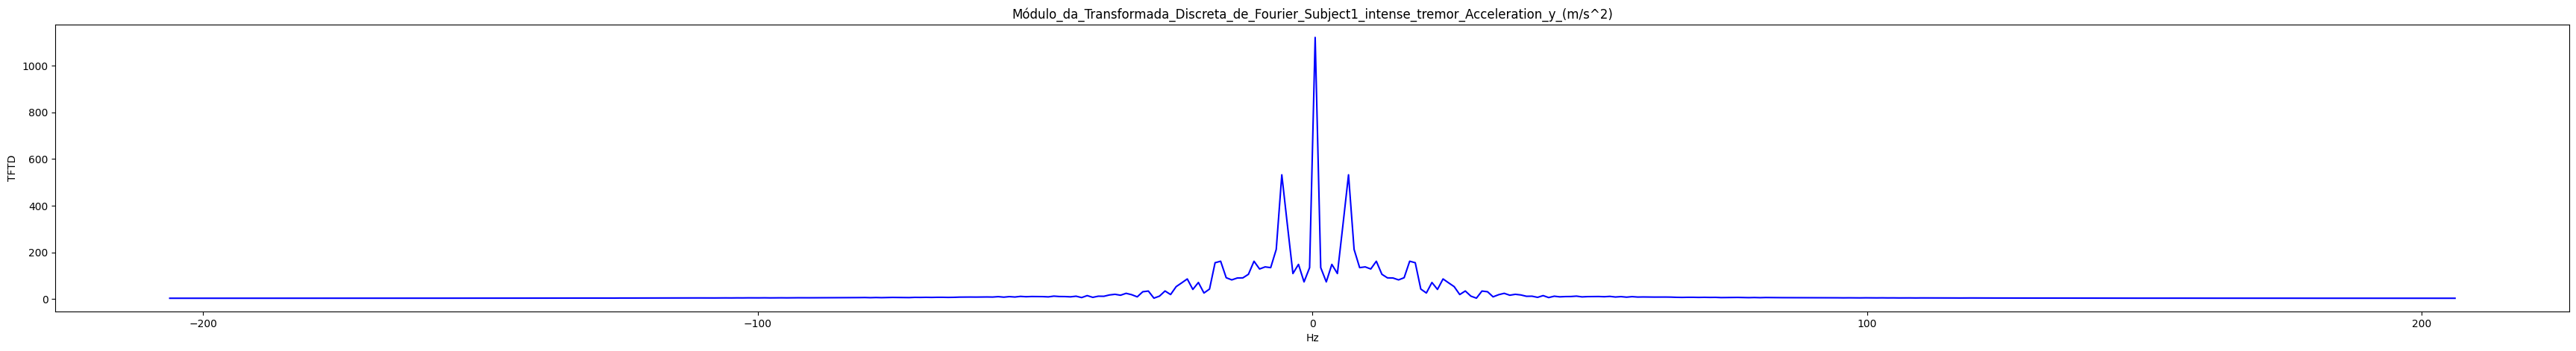

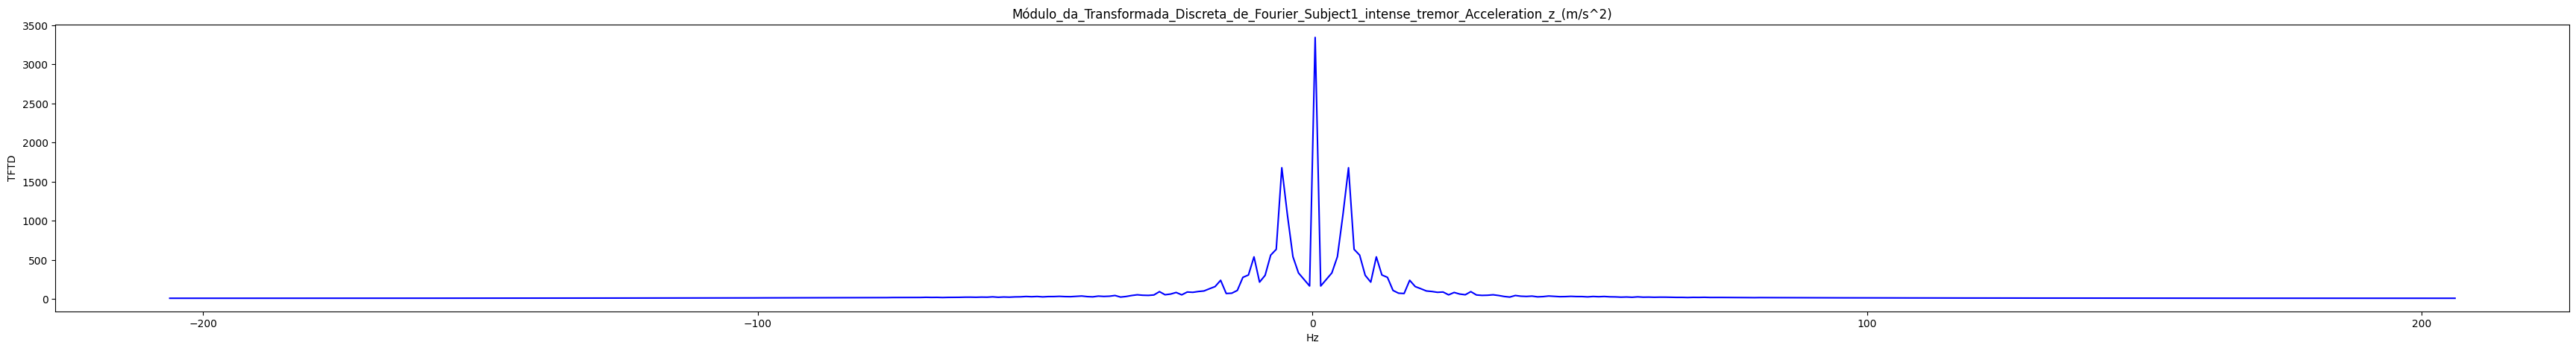

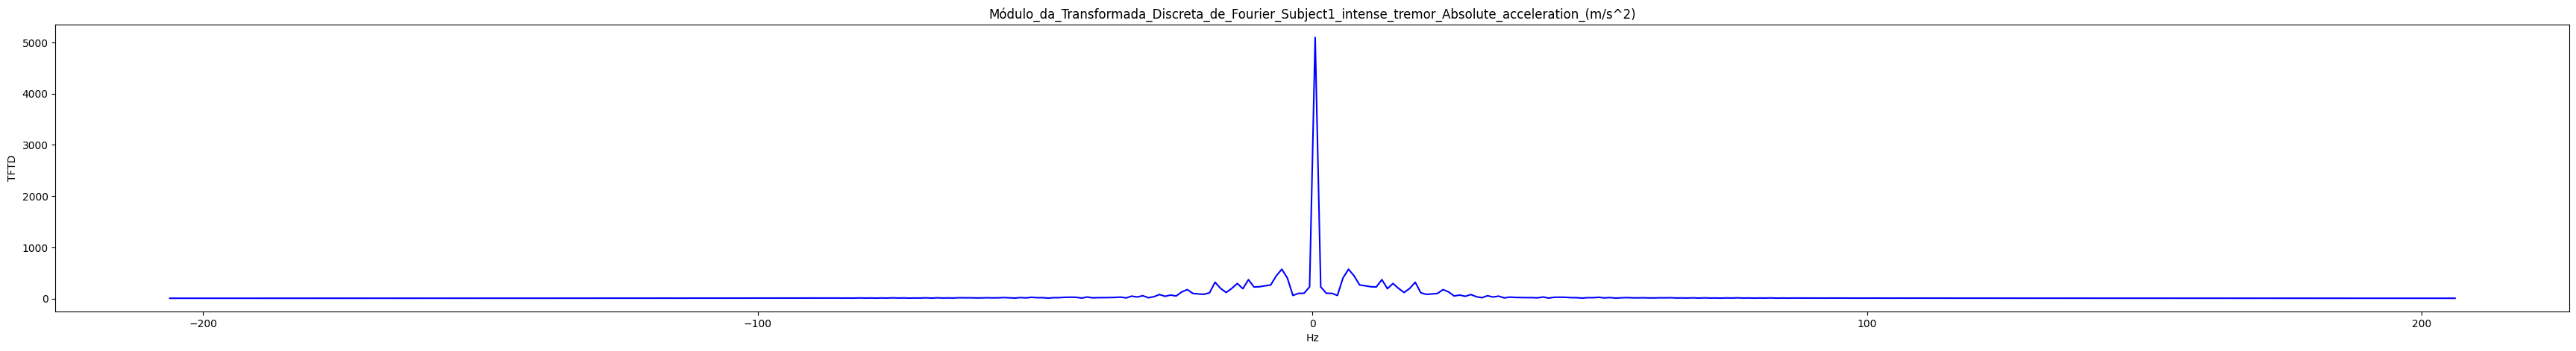

In [14]:
tam1 = 412 #por causa da frequência de amostragem de 412Hz
st = 1000
for i,j in signals['Subject1'].items():
  for k,l,m in zip(j.keys(),j.values(),range(5)):
    if m!=0:
      #st = 0
      #while st+tam1 < len(l):
        TFTD(l[st:st+tam1],'Subject1_'+i+'_'+k,m) #300 samples representam1 uma janela de 1s.
       # st+=tam1

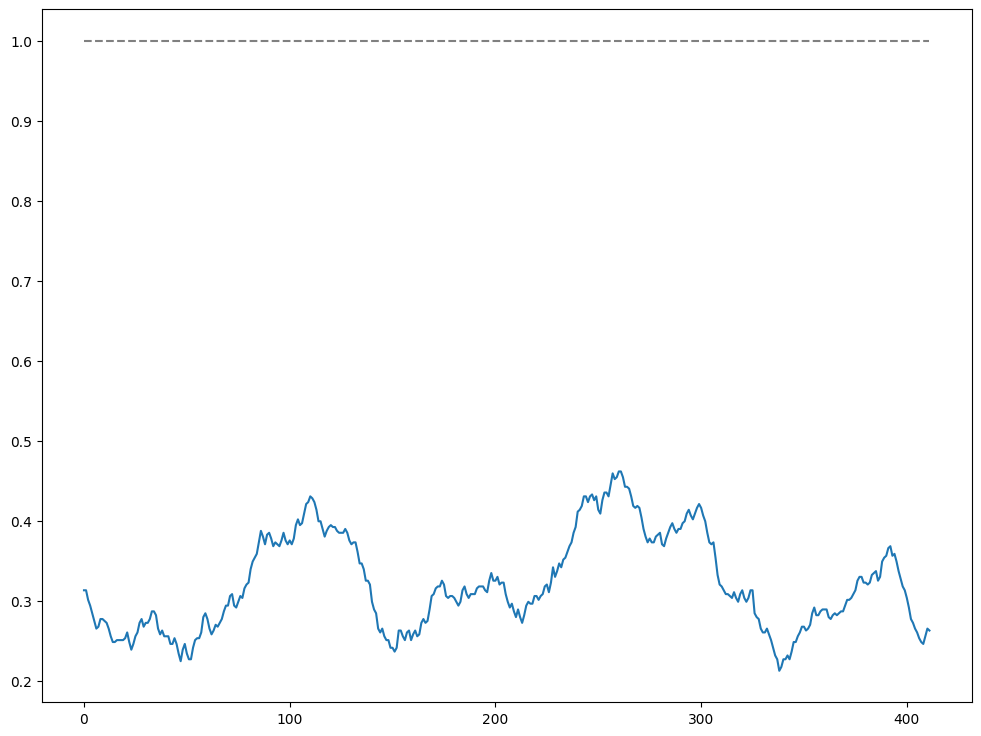

0


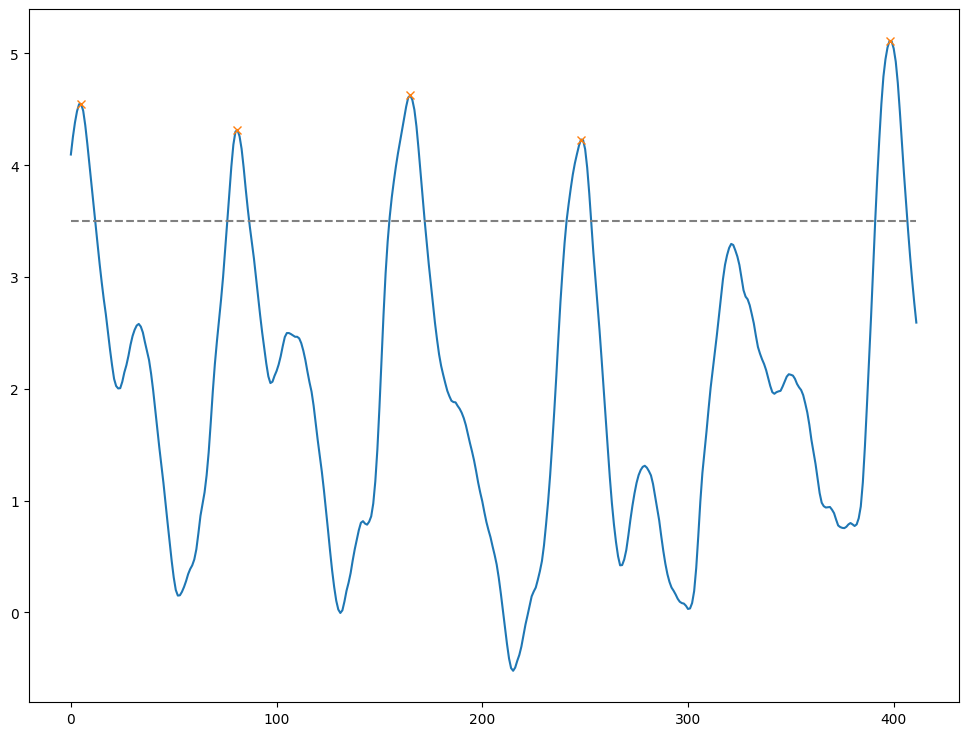

5


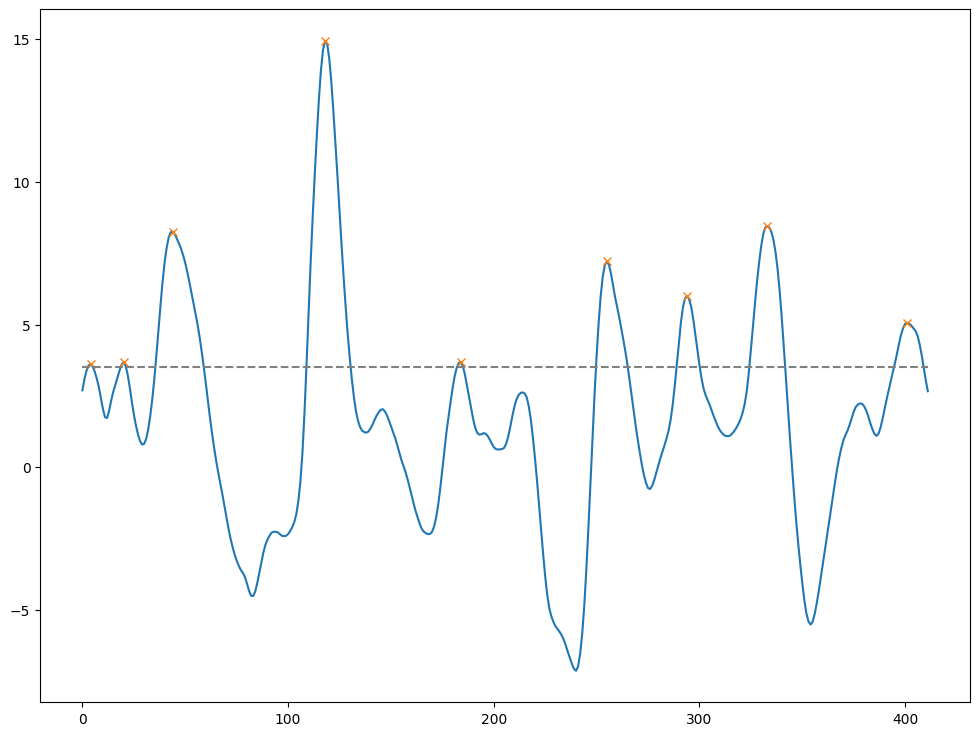

9


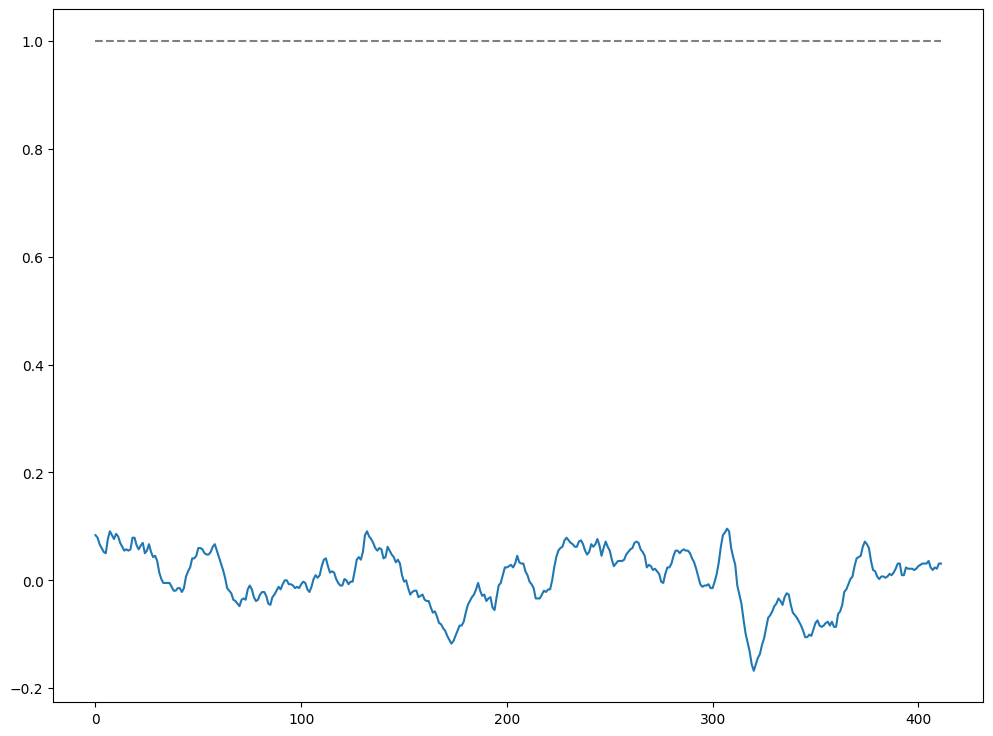

0


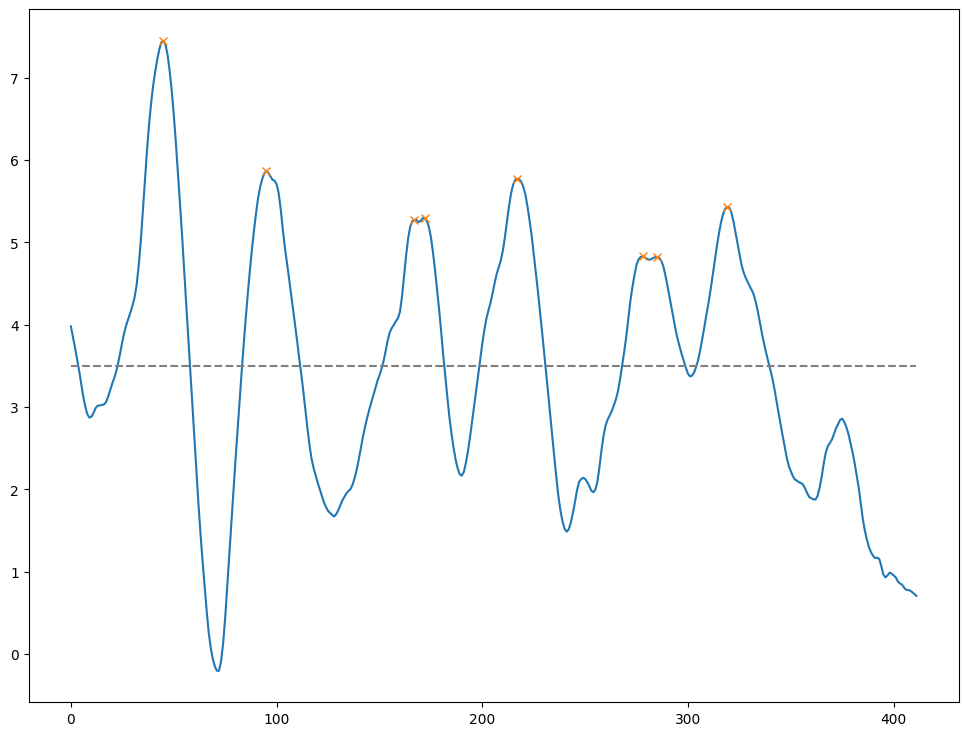

8


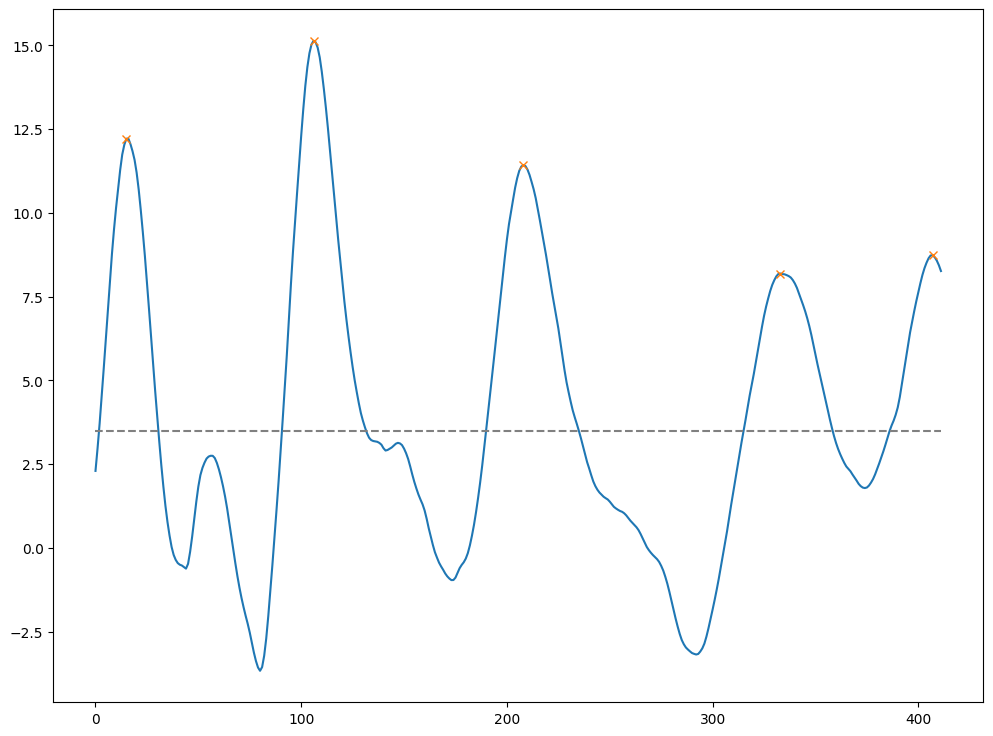

5


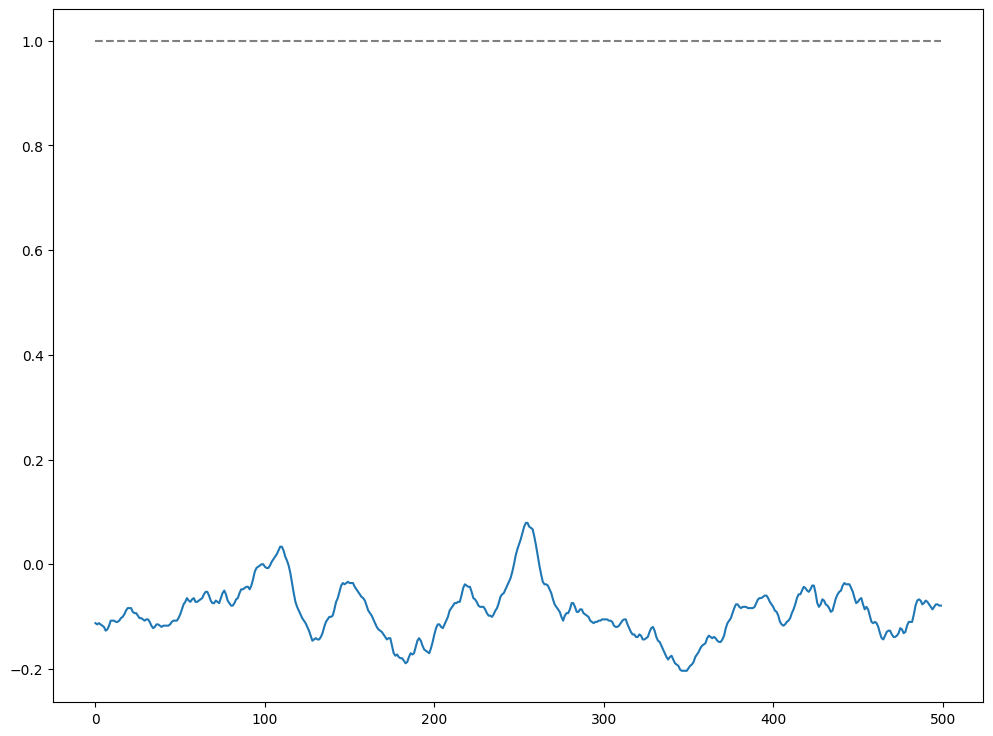

0


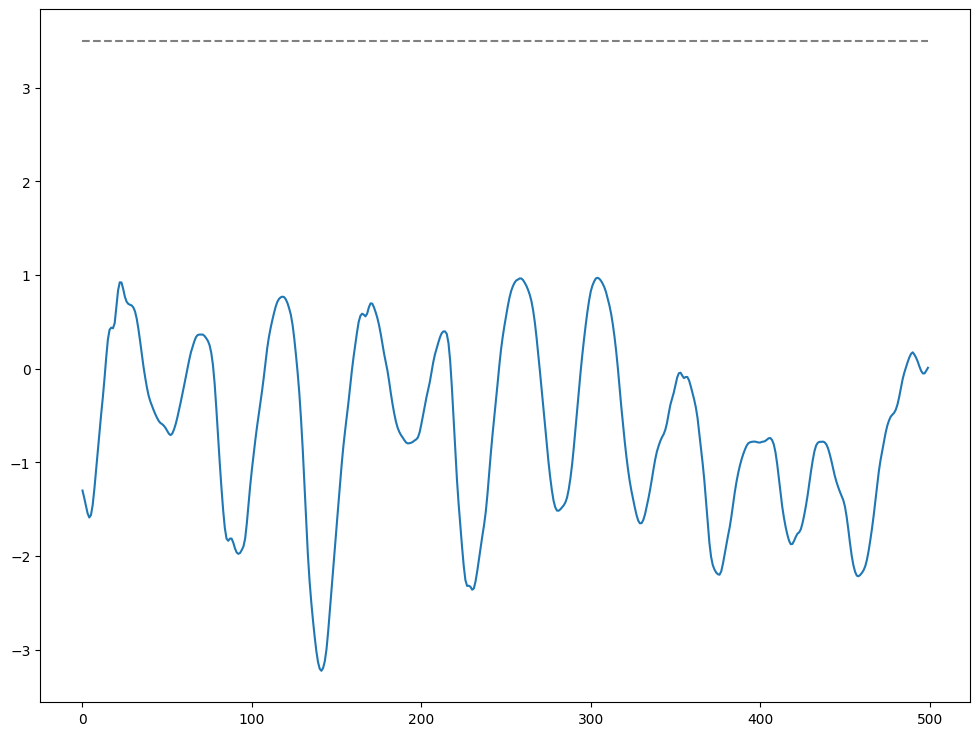

0


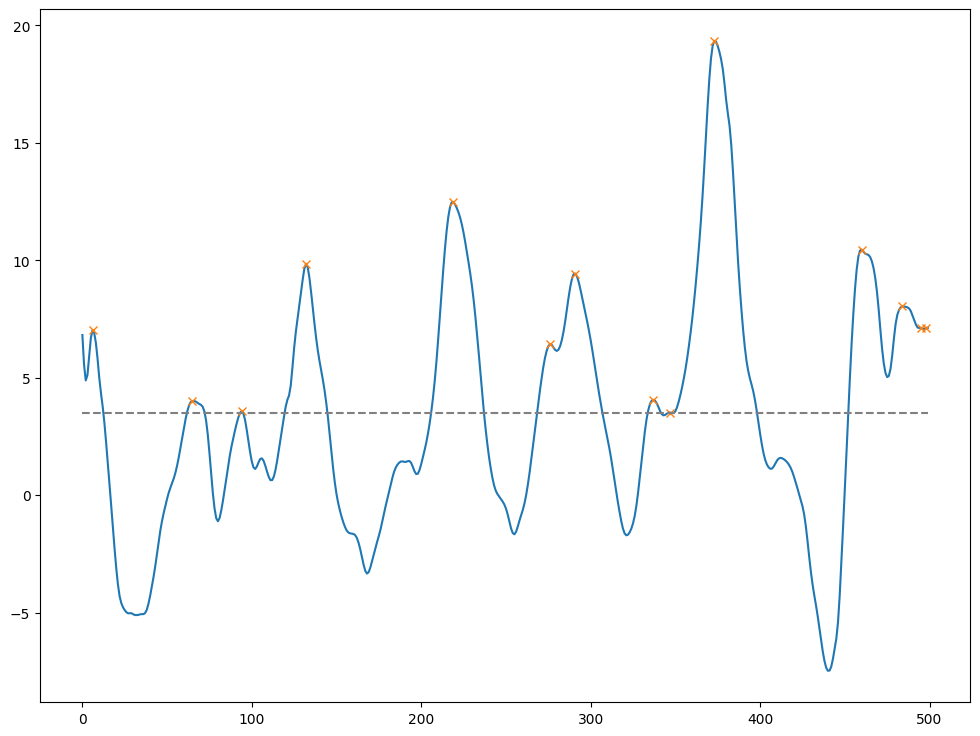

14


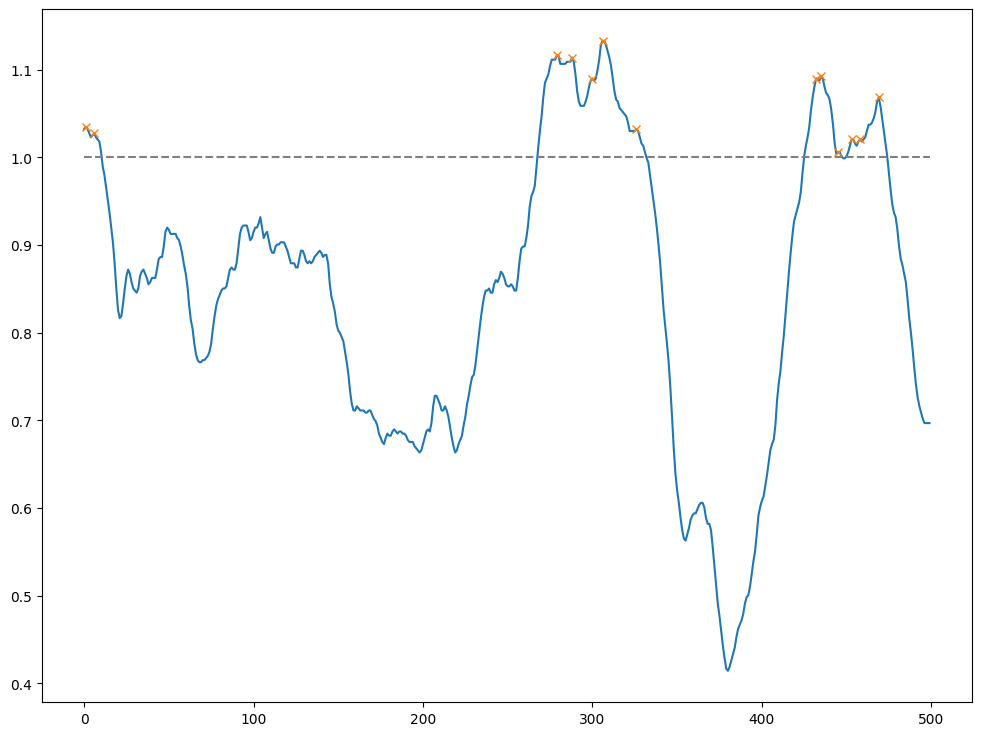

13


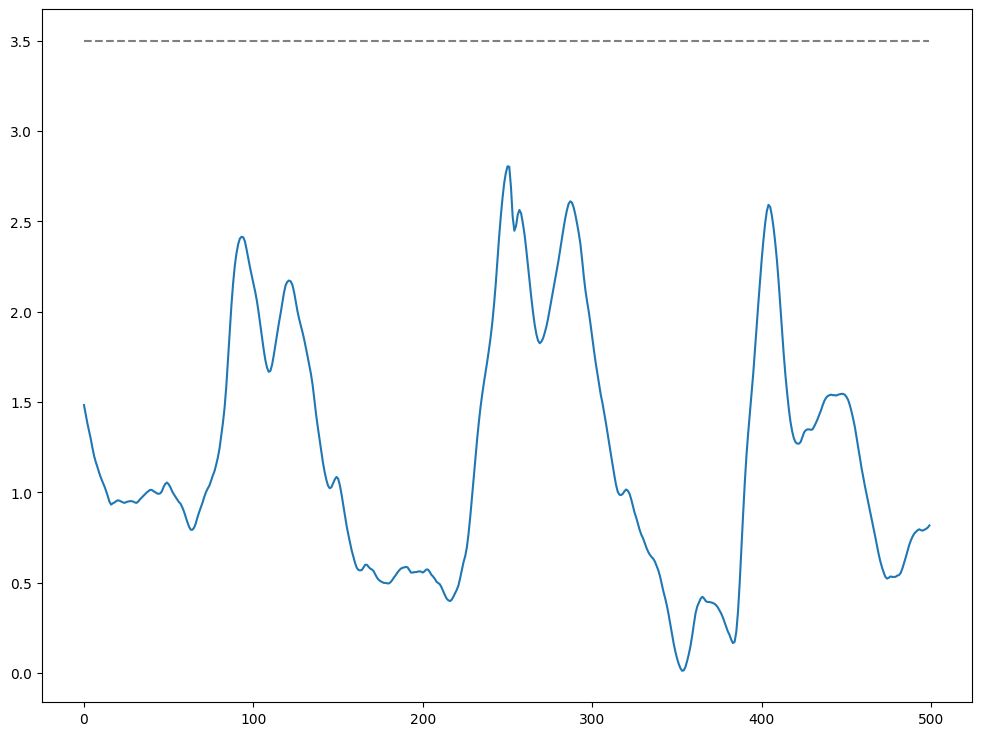

0


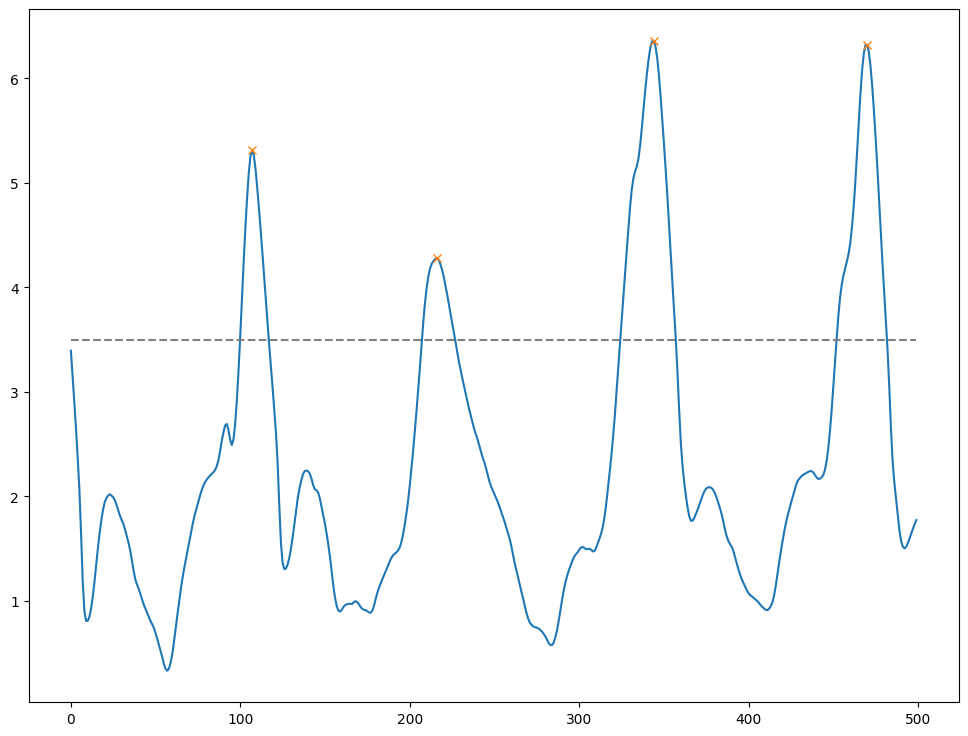

4


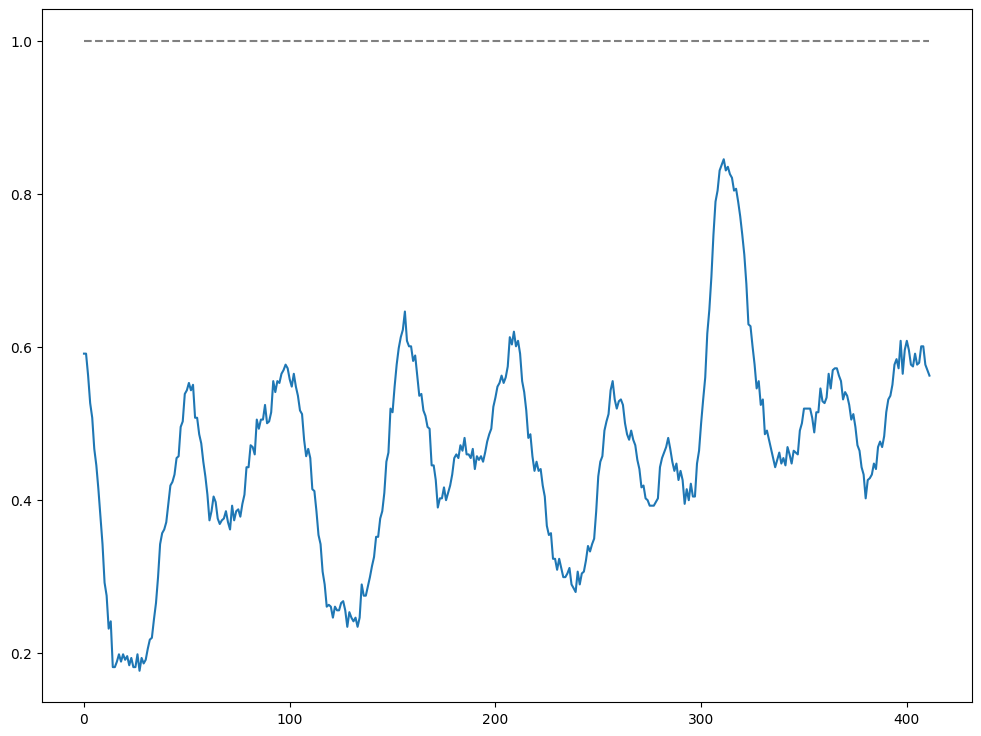

0


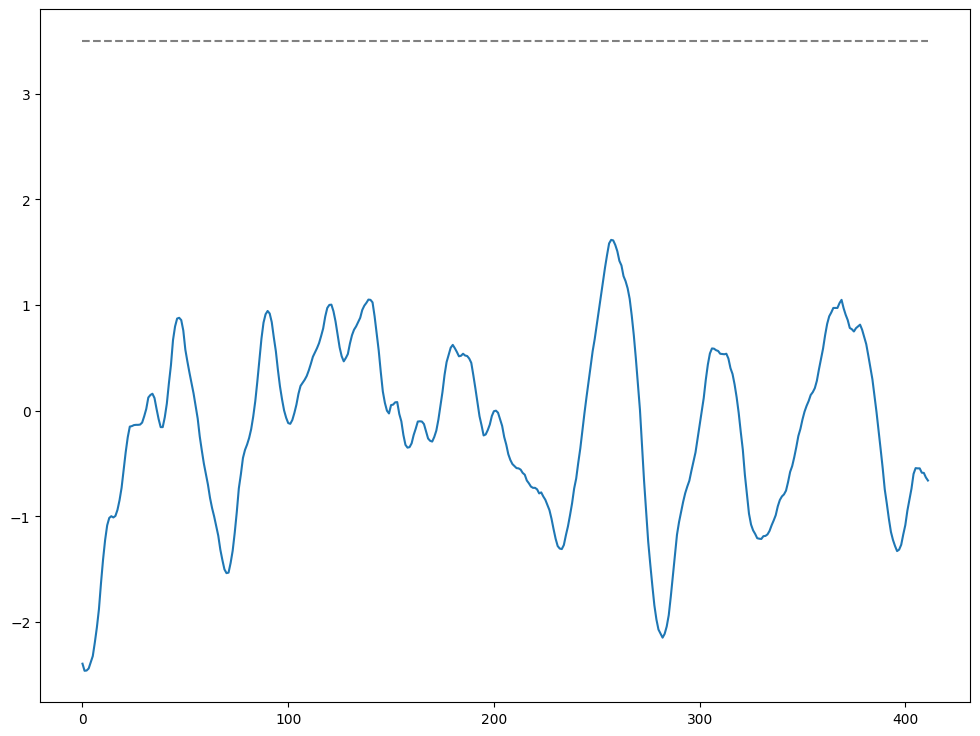

0


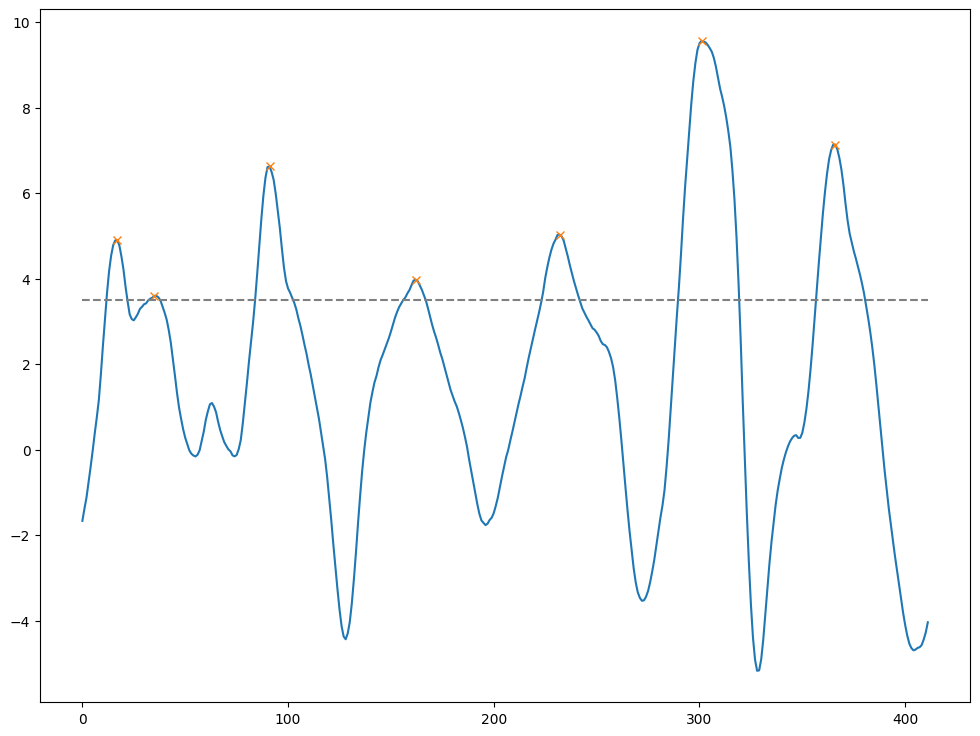

7


In [15]:
for n in range(5):
 subject = 'Subject'+str(n+1)
 if n <= 1 or n == 4:
   st = 1000
   tam = 412
 elif n <= 3:
   st = 800
   tam = 500
 for i,j in signals[subject].items():
  if i=='stop':
    h = 1
  elif i == 'light_tremor':
    h = 3.5
  else:
    h = 3.5
  for k,l,m in zip(j.keys(),j.values(),range(5)):
    if k=='Acceleration_x_(m/s^2)':
      #st = 0
      #while st+tam1 < len(l):
        l_new = l[st:st+tam]
        peaks, _ = find_peaks(l_new, height=h) #300 samples representam1 uma janela de 1s.
        plt.figure(figsize=(12, 9), dpi=100)
        plt.plot(l_new)
        plt.plot(peaks, l_new[peaks], 'x')
        plt.plot(np.ones_like(l_new)*h, "--", color="gray")
        plt.savefig (subject+'_'+i+'x')
        plt.show()
        print (peaks.size)
       # st+=tam1

In [16]:
def TFTD_generate_imag(chanels:list,text:str,k:int):
        fhz = np.linspace(-206,206,len(chanels)) ##intervalo de frequências validado pela PSD
        Xtf = fftpack.fftshift(fftpack.fft(chanels))
        plt.figure(figsize=(16, 8), dpi=100)
        #plt.plot(Xtf)
        plt.plot(fhz, abs(Xtf))
        plt.savefig (text)

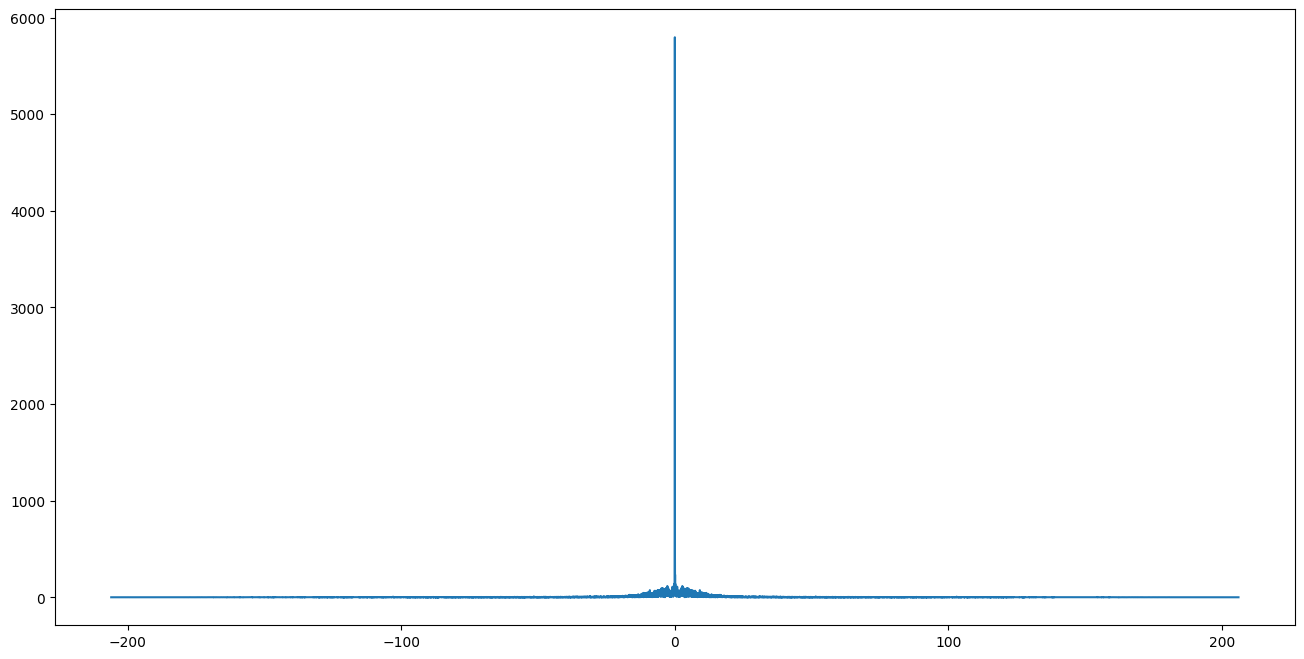

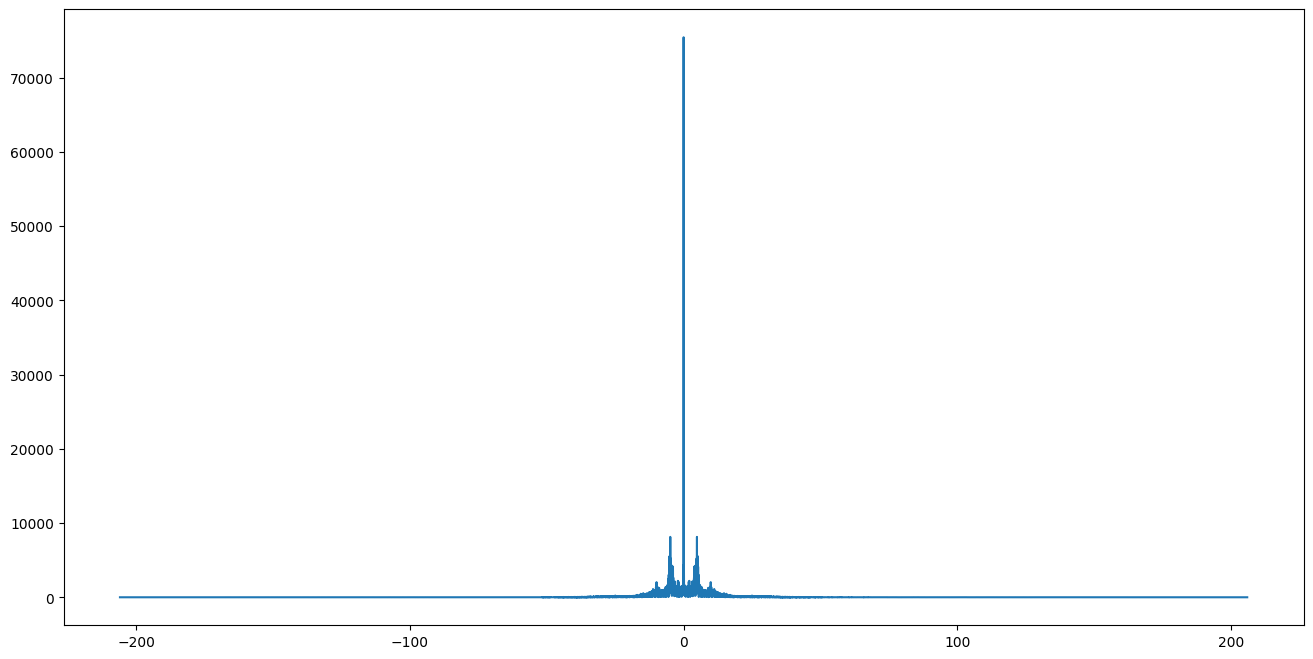

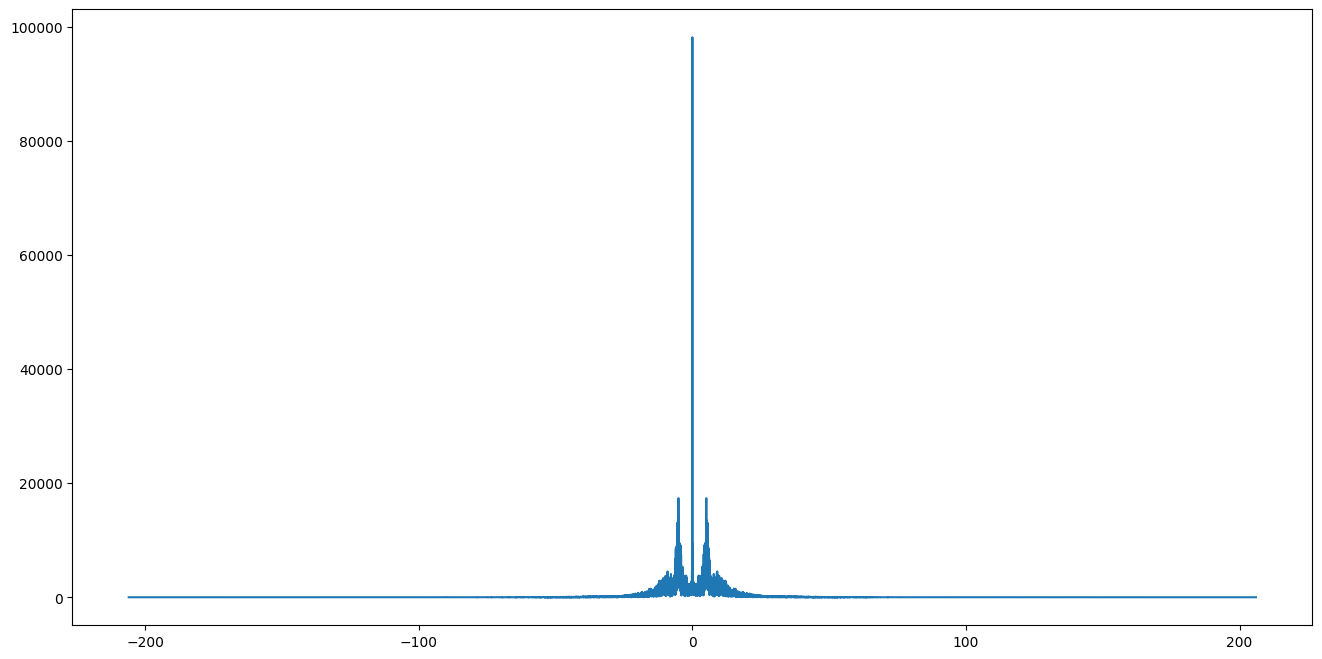

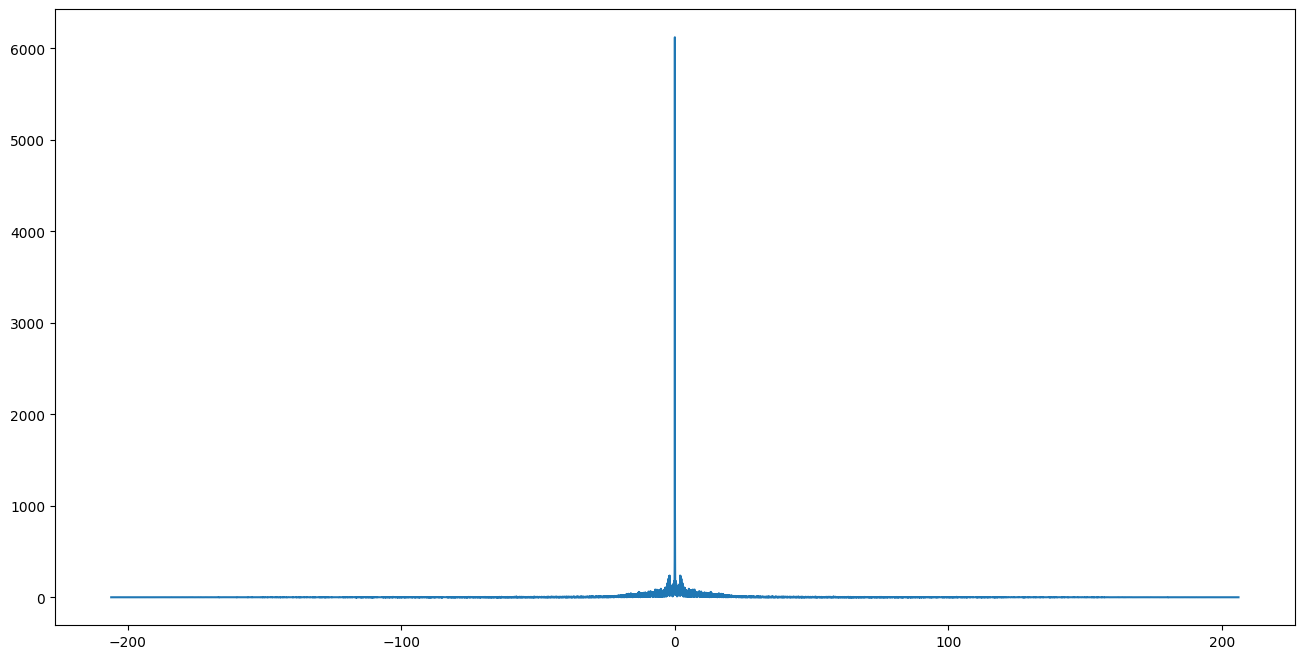

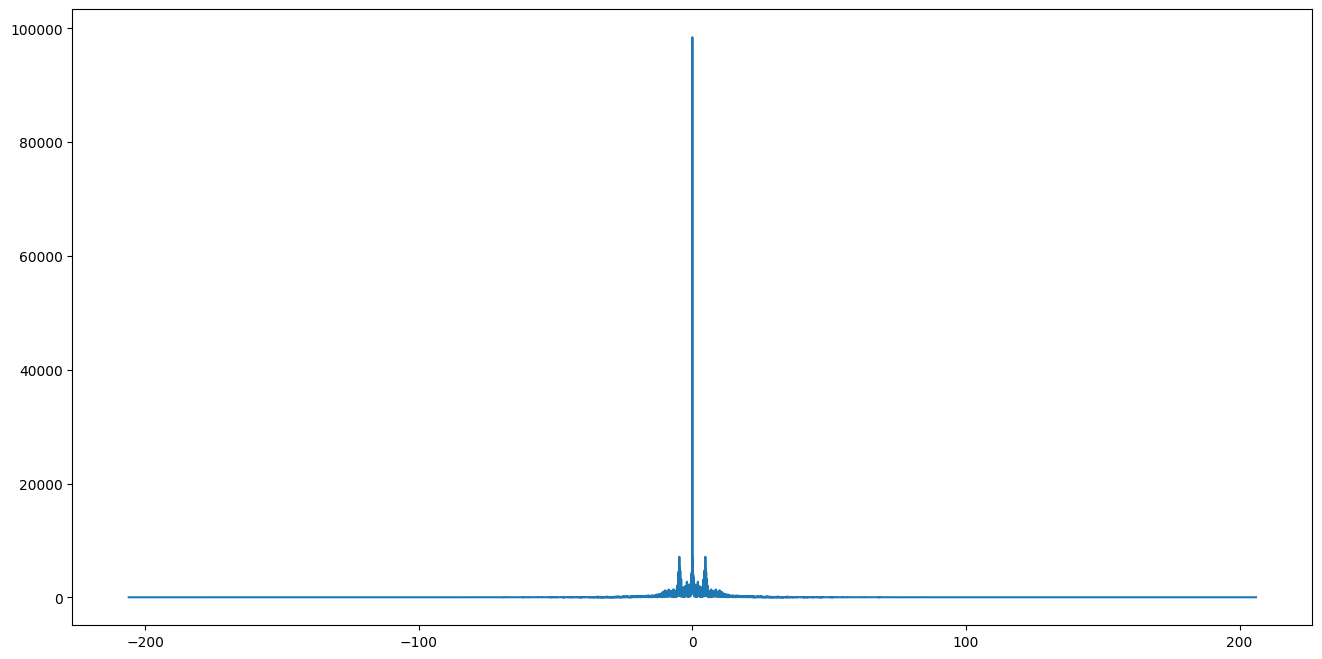

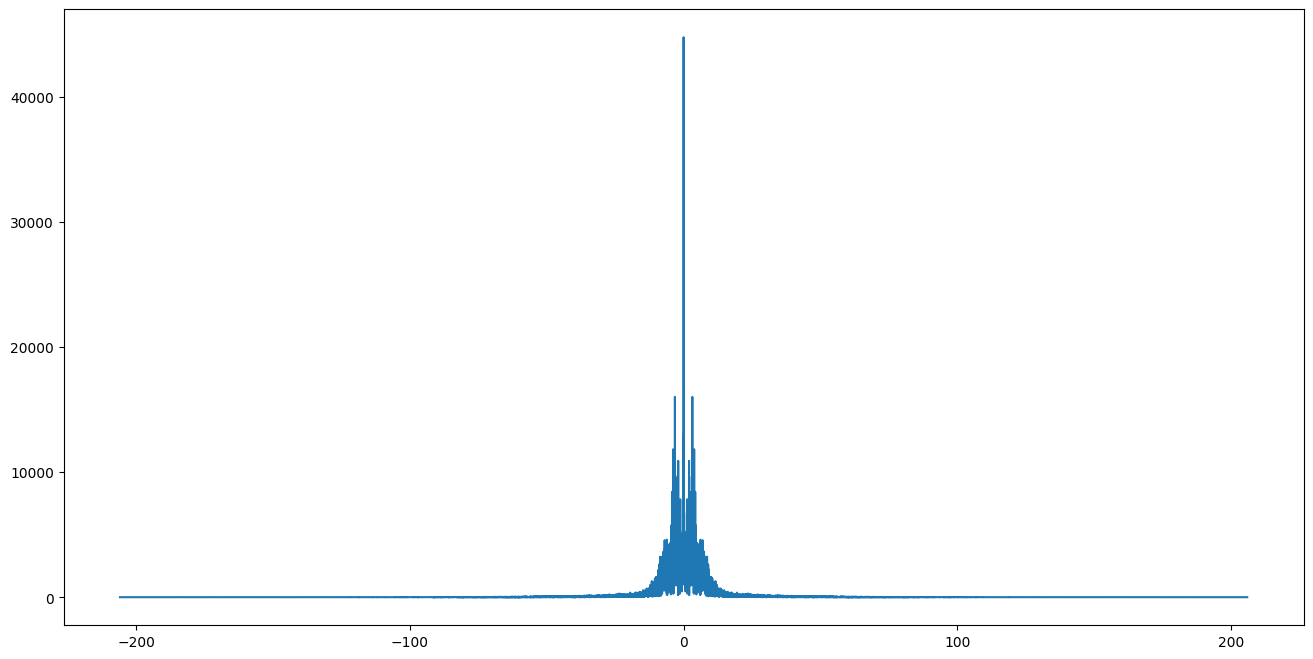

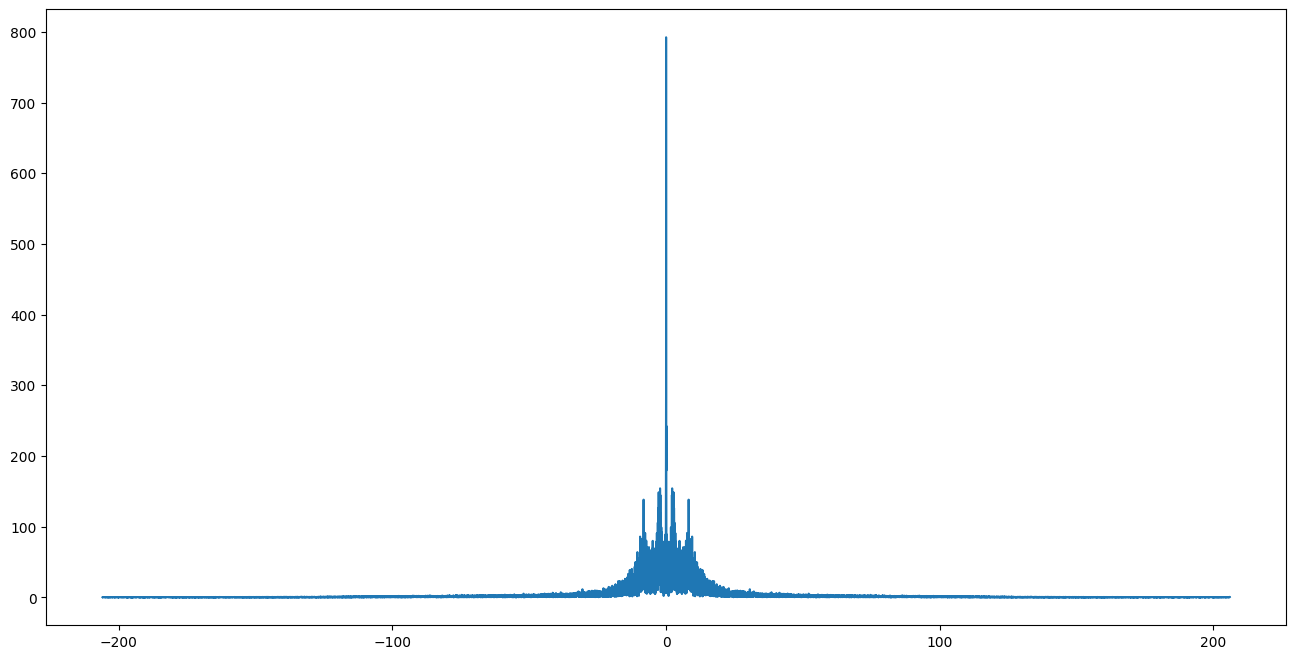

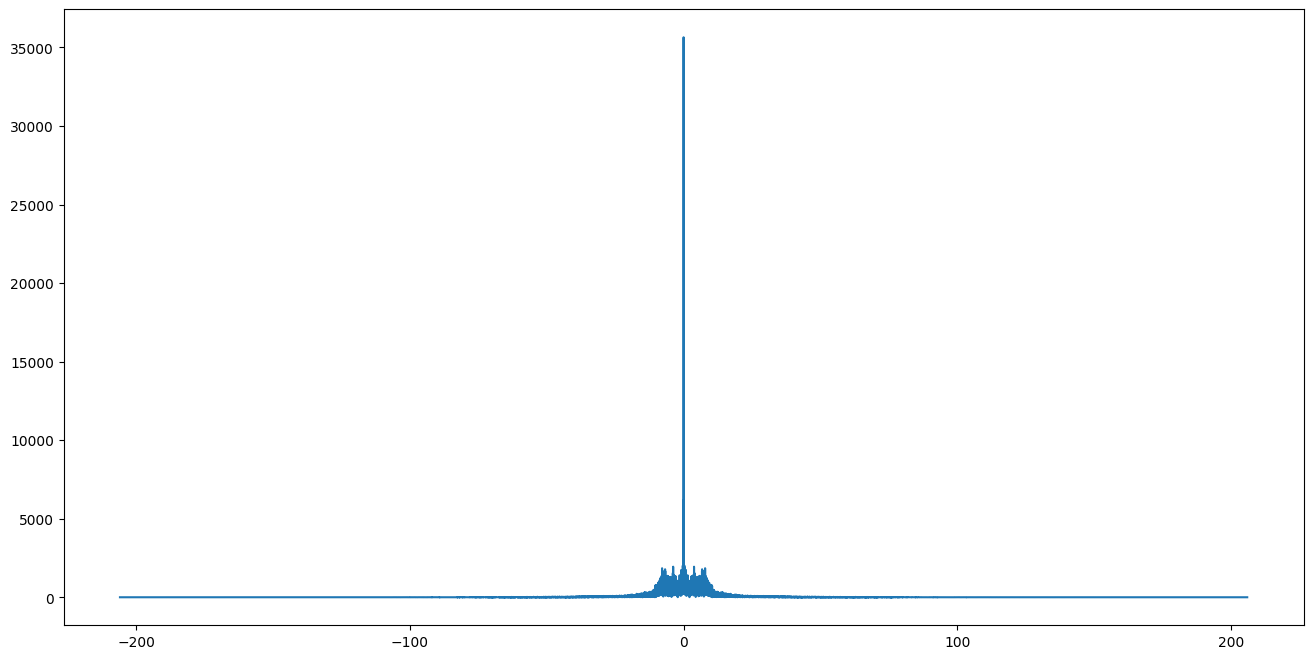

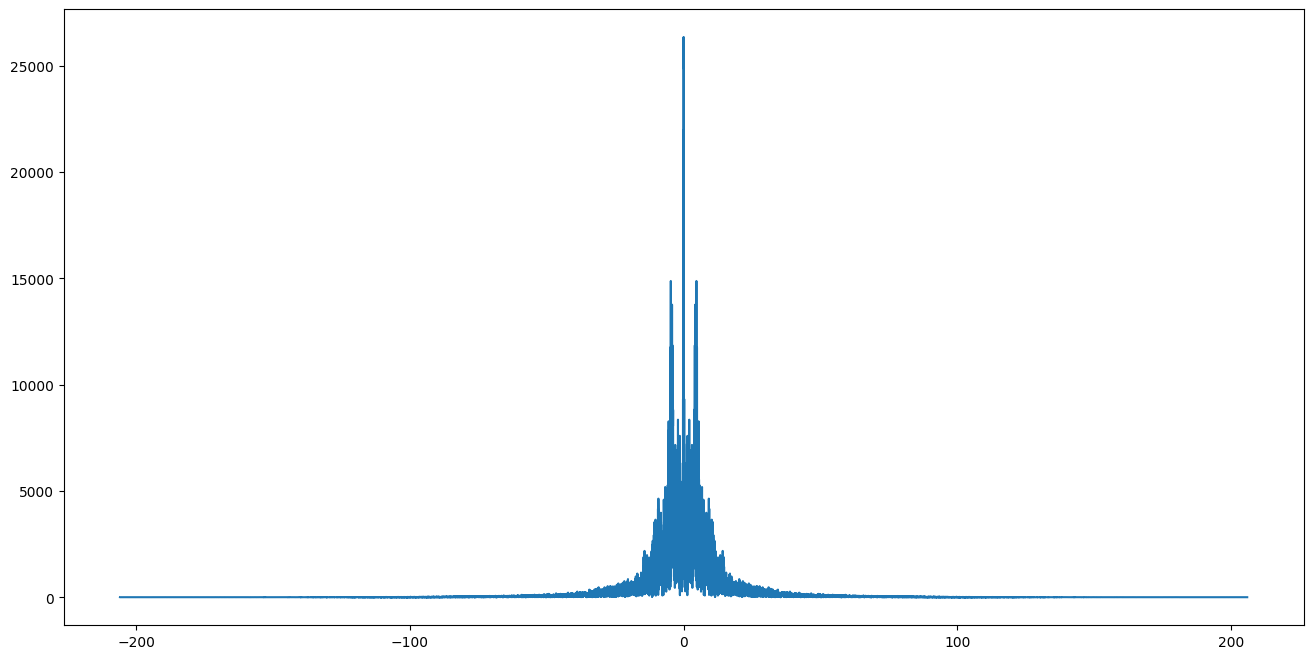

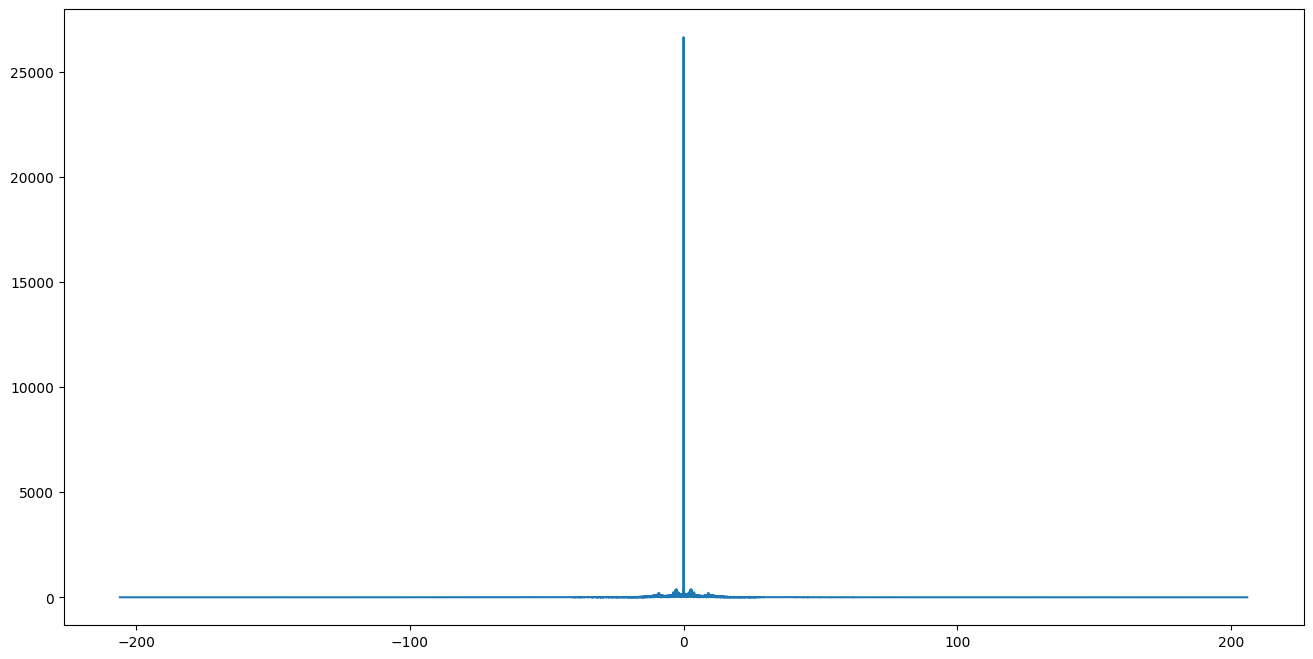

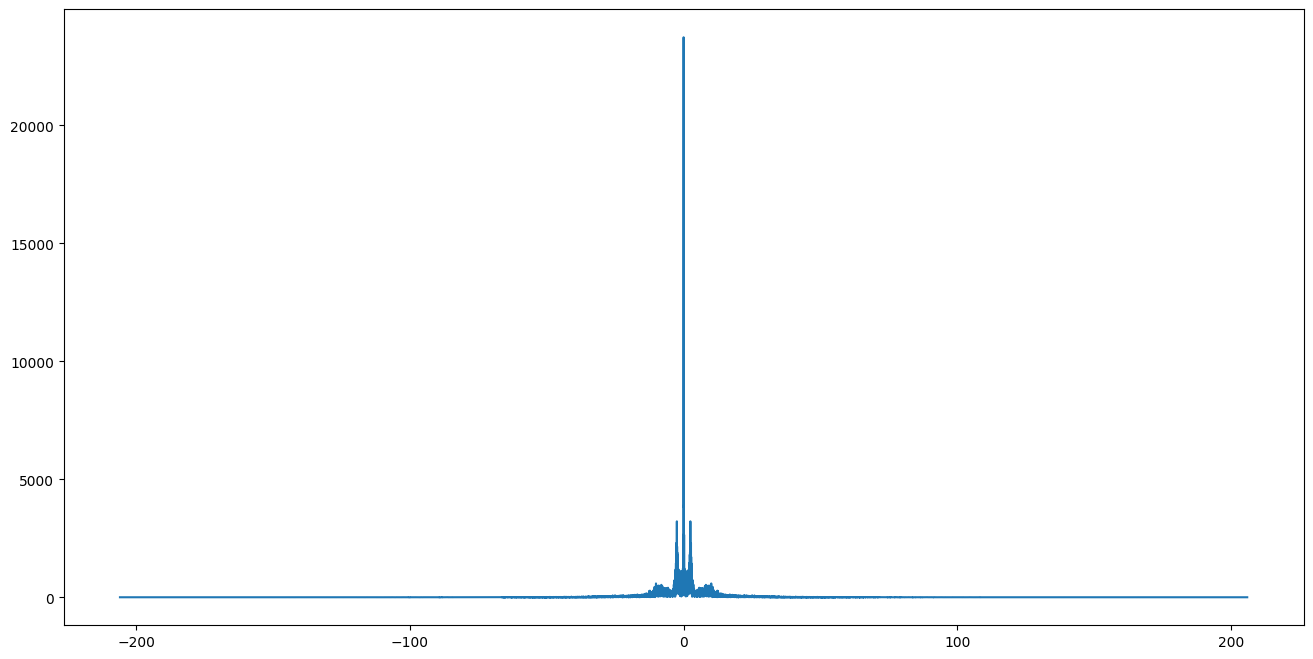

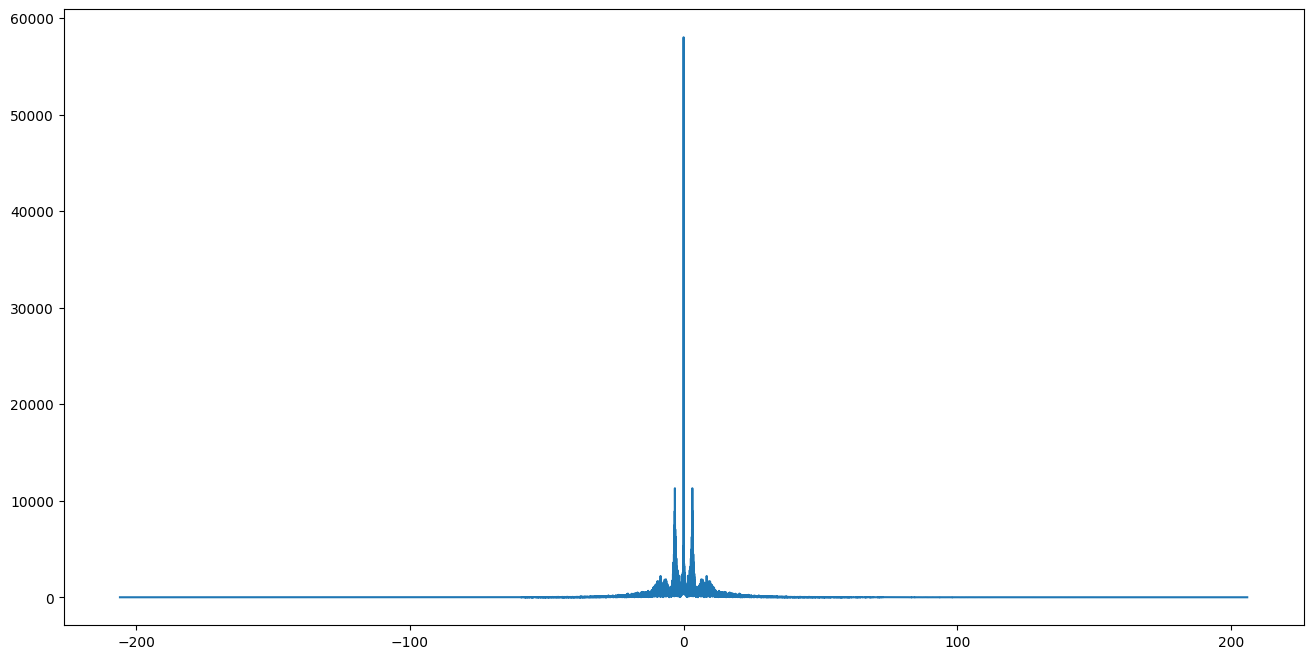

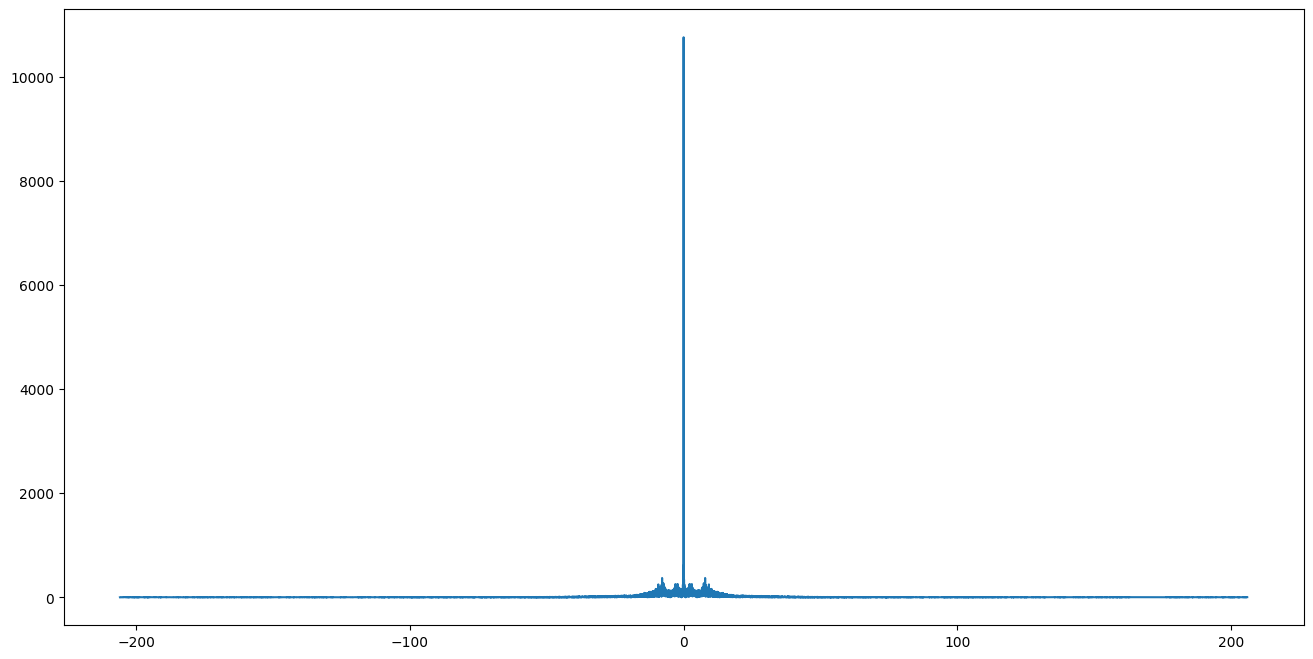

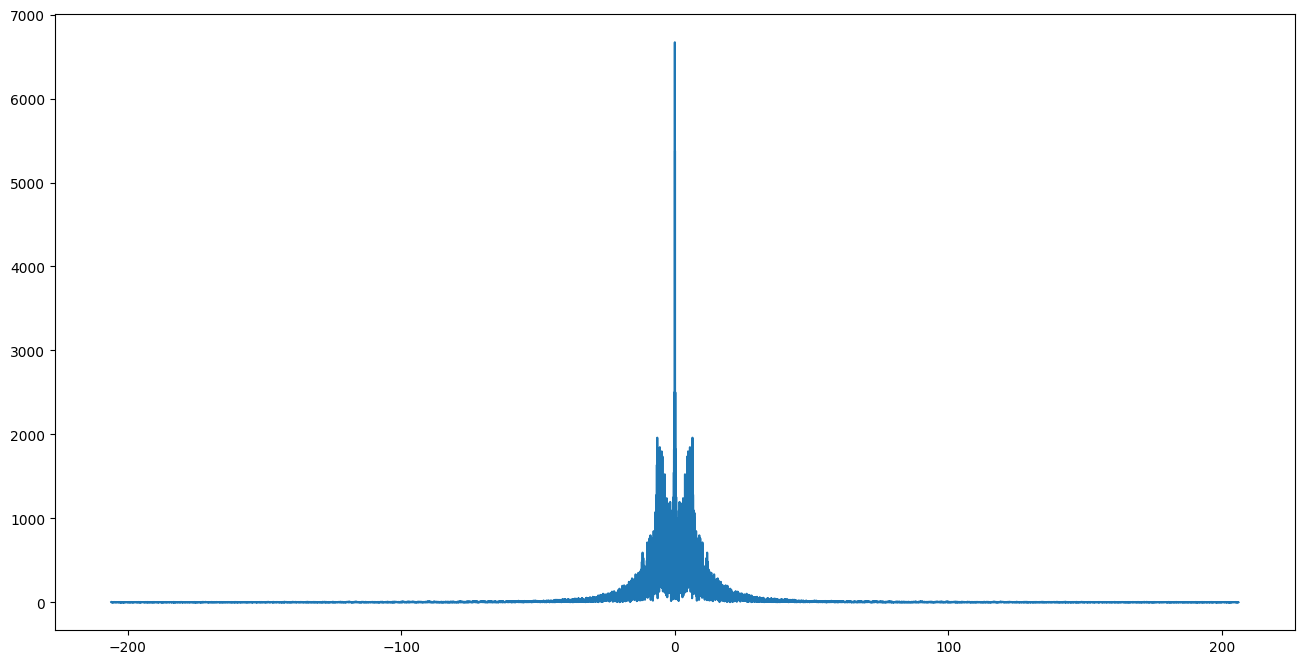

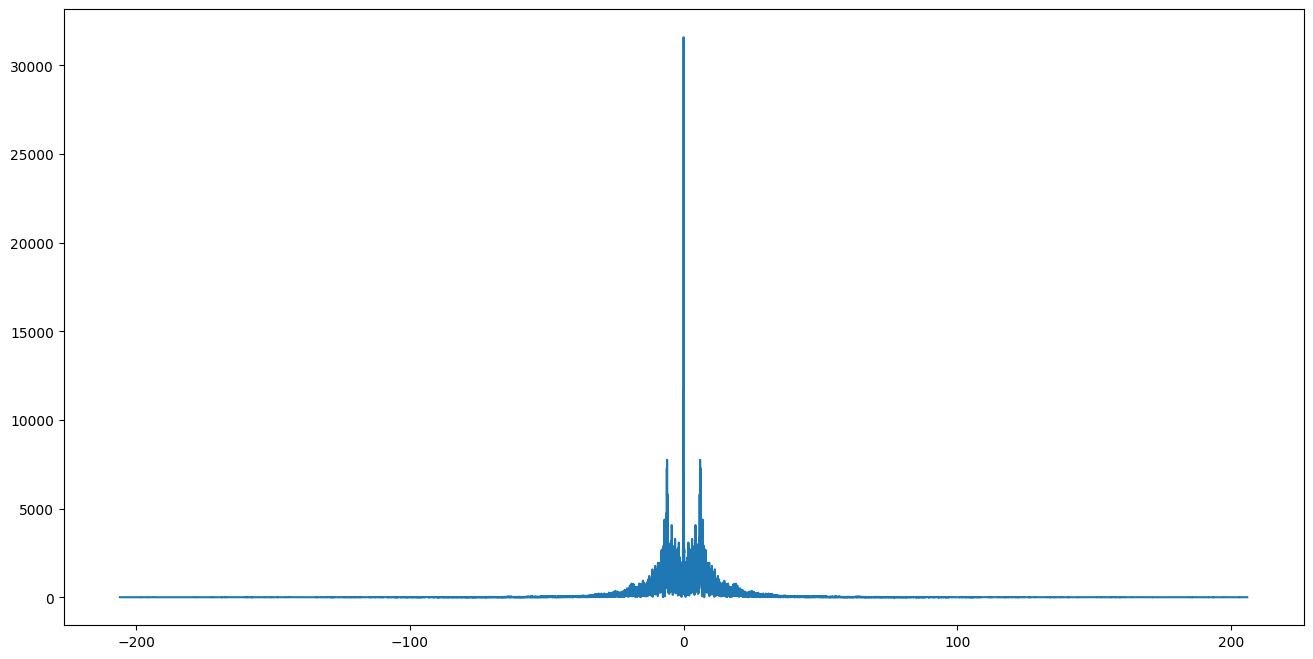

In [17]:
for n in range(5):
 subject = 'Subject'+str(n+1)
 for i,j in signals[subject].items():
  for k,l,m in zip(j.keys(),j.values(),range(5)):
    if k=='Acceleration_x_(m/s^2)':
      #st = 0
      #while st+tam1 < len(l):
        TFTD_generate_imag(l,'TFTD_'+subject+'_'+i+'x',m) #300 samples representam1 uma janela de 1s.
       # st+=tam1

In [18]:
def PSD_generate_img(chanels:list,text:str, ch:int, fs:float):
  s = chanels
  (f, S) = signal.periodogram(s, fs,scaling='density')
  plt.figure(figsize=(25, 5), dpi=100)
  plt.subplot(1,4,ch, title=text)
  plt.semilogy(f, S)
  #plt.ylim([1e-7, 1e2])
  plt.xlim([0,20])
  plt.xlabel('frequency [Hz]')
  plt.ylabel('PSD [V**2/Hz]')
  plt.savefig (text)

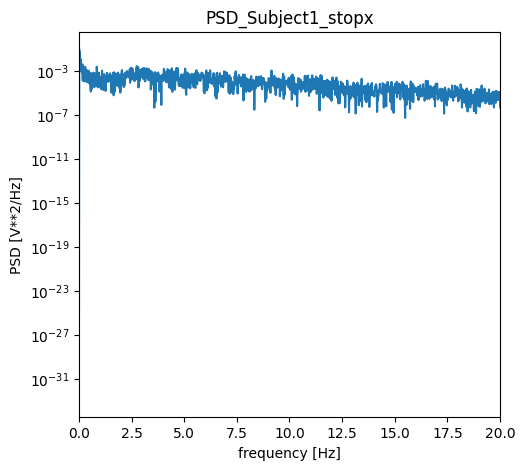

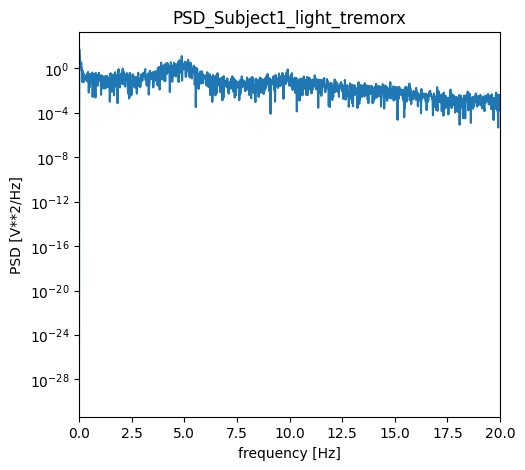

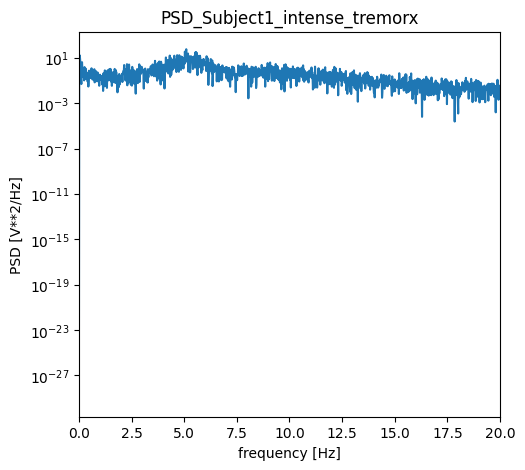

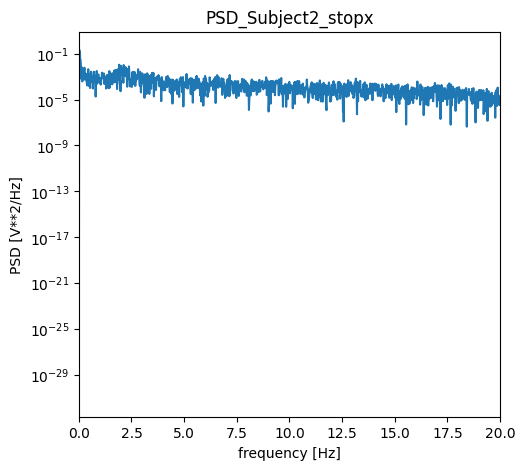

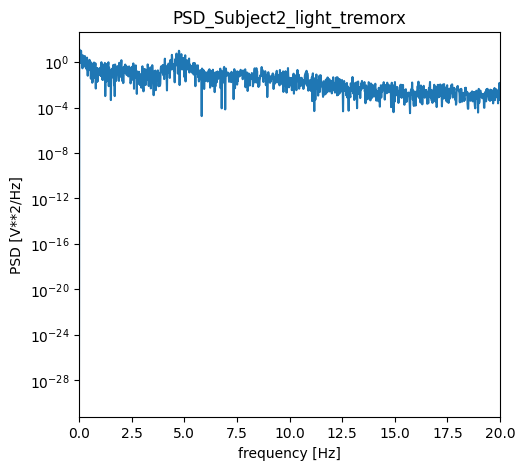

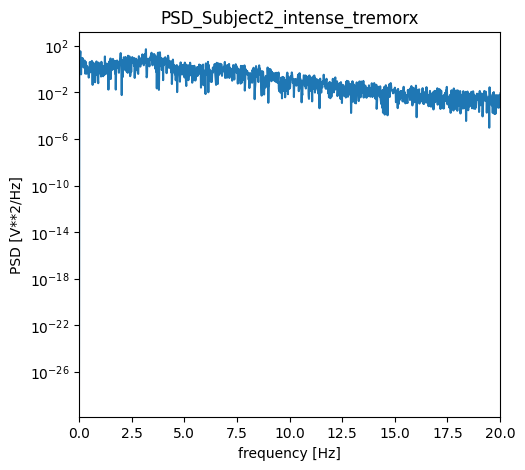

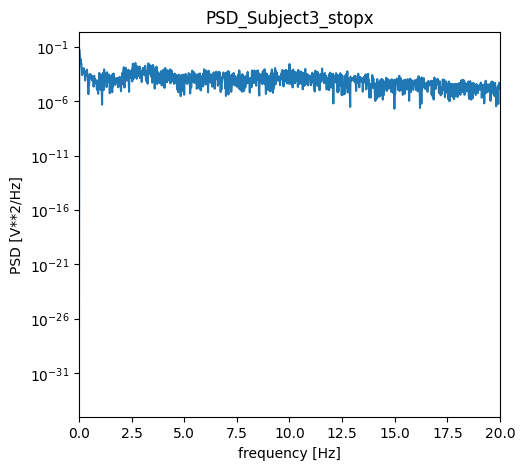

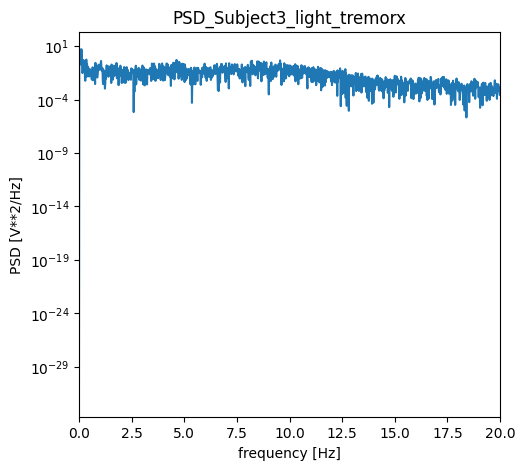

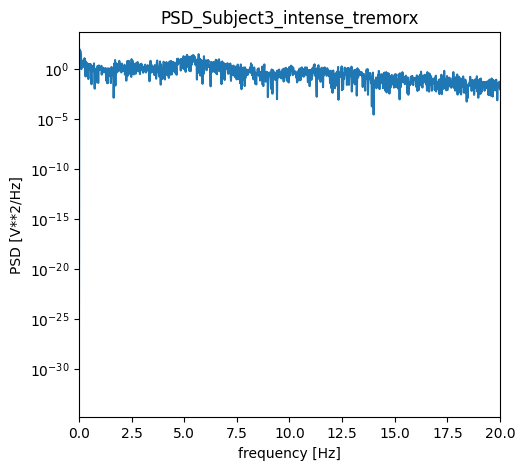

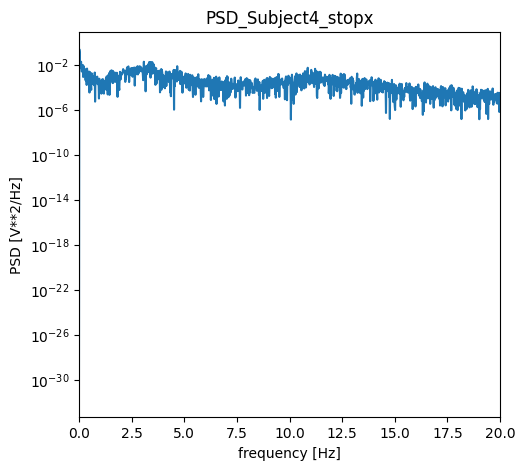

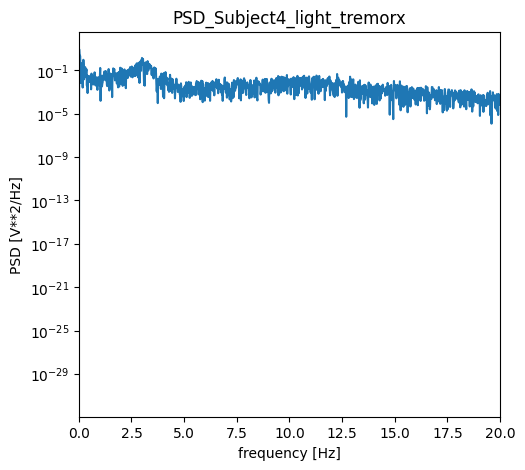

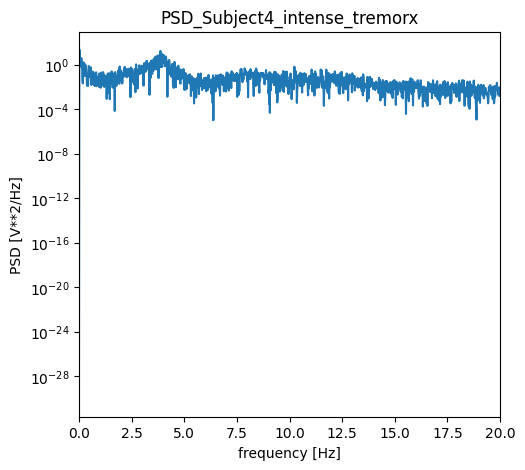

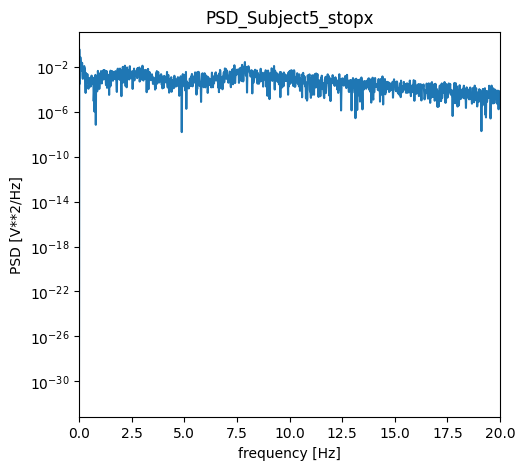

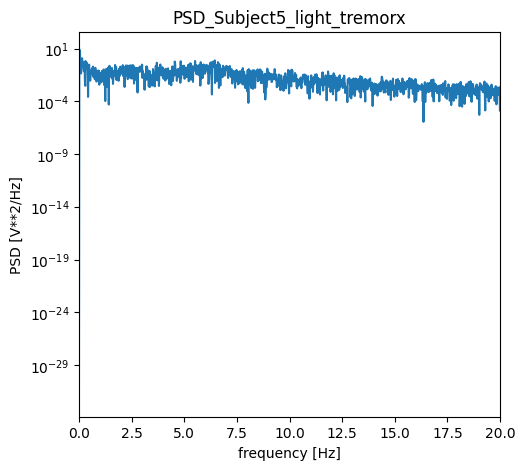

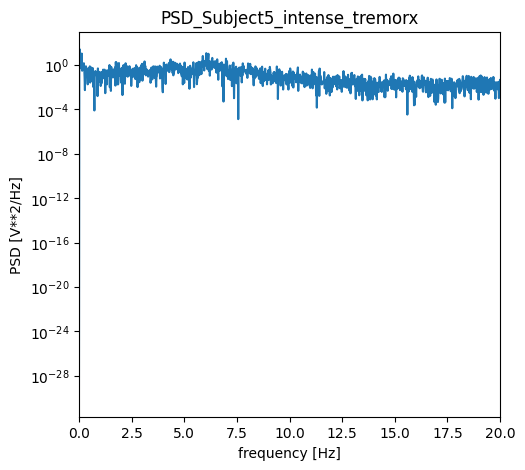

In [19]:
for n in range(5):
 subject = 'Subject'+str(n+1)
 for i,j in signals[subject].items():
  for k,l,m in zip(j.keys(),j.values(),range(5)):
    if k=='Acceleration_x_(m/s^2)':
      PSD_generate_img(l,'PSD_'+subject+'_'+i+'x',m,fs[n])

Como a PSD ficou muito ruidosa, vamos aplicar um filtro passa-baixa com frequência de corte em 15Hz, e reduzir o nfft para 512.

In [20]:

from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def low_pass_filter (x, fs, f0):
  b, a = butter_lowpass(f0, fs)
  y = lfilter(b, a, x)
  return y





In [21]:
def PSD_generate_img_filtered(chanels:list,text:str, ch:int, fs:float):
  fc = 15
  s = low_pass_filter(chanels,fs,fc)
  (f, S) = signal.periodogram(s, fs, nfft=512,scaling='density')
  plt.figure(figsize=(25, 5), dpi=100)
  plt.subplot(1,4,ch, title=text)
  plt.semilogy(f, S)
  #plt.ylim([1e-7, 1e2])
  plt.xlim([0,20])
  plt.xlabel('frequency [Hz]')
  plt.ylabel('PSD [V**2/Hz]')
  plt.savefig (text)

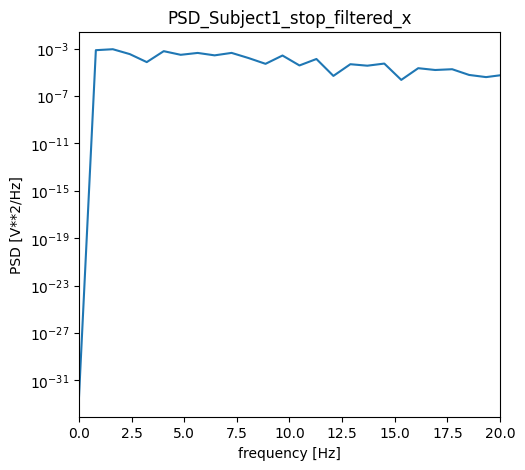

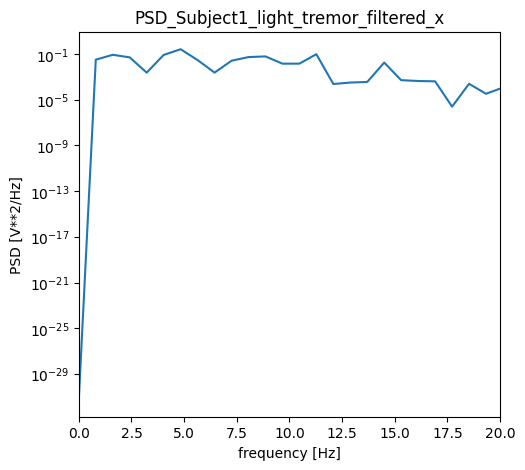

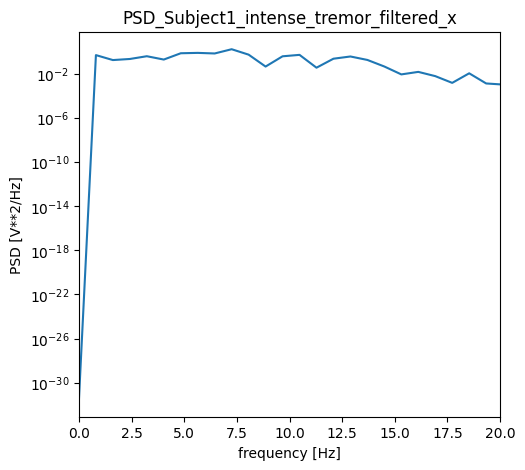

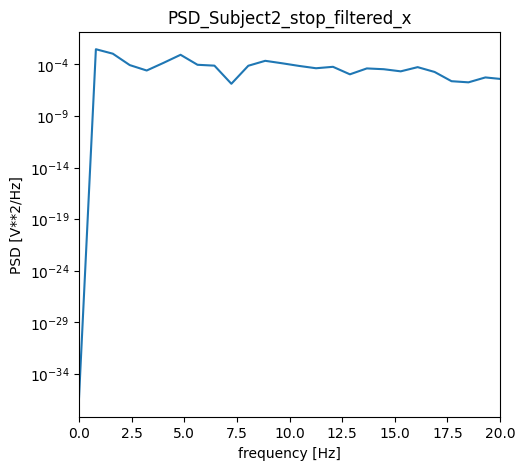

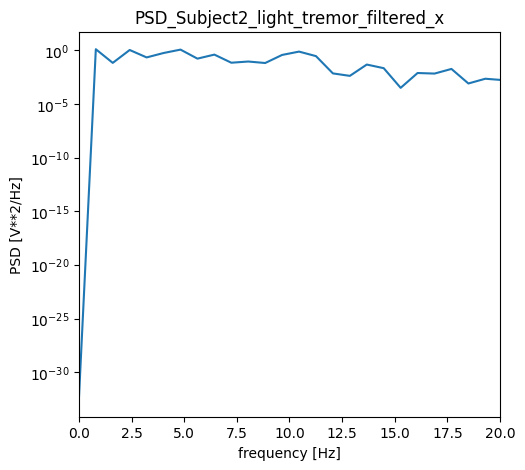

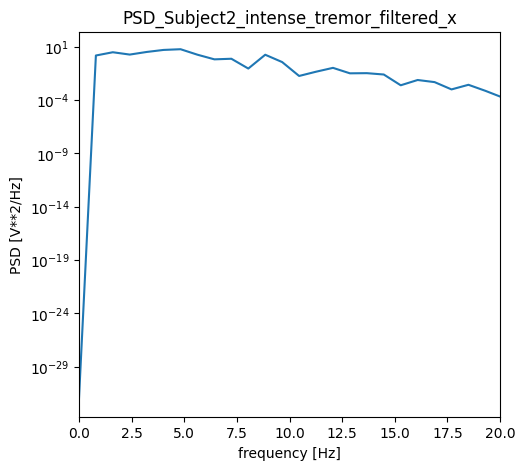

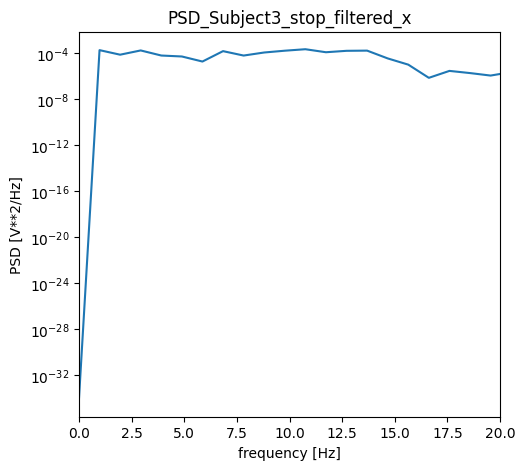

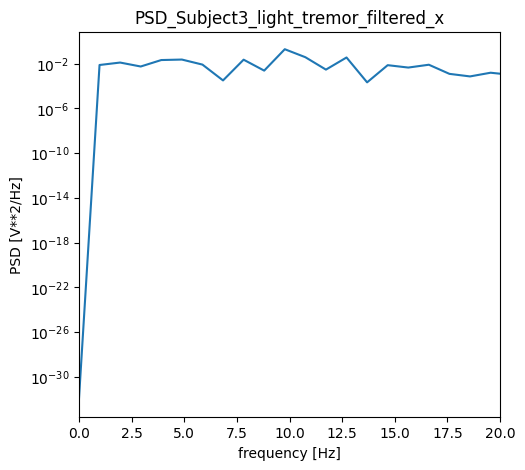

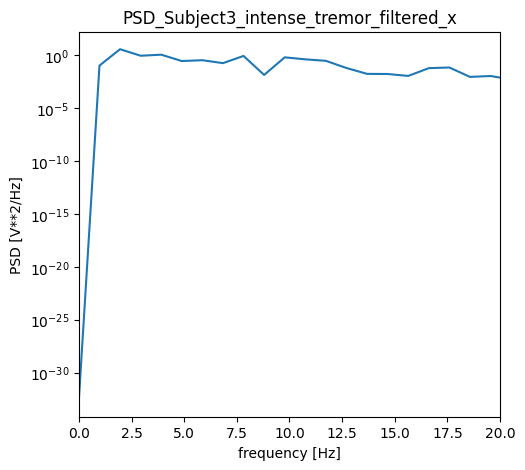

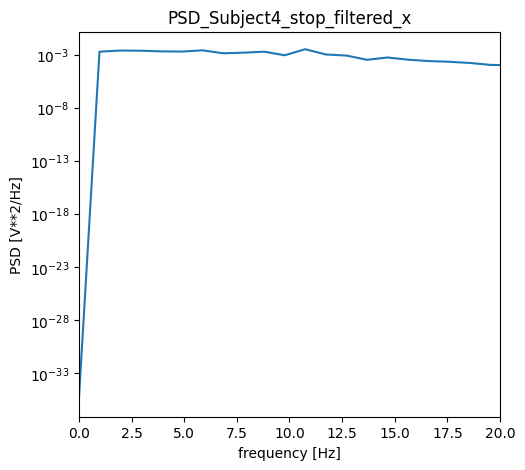

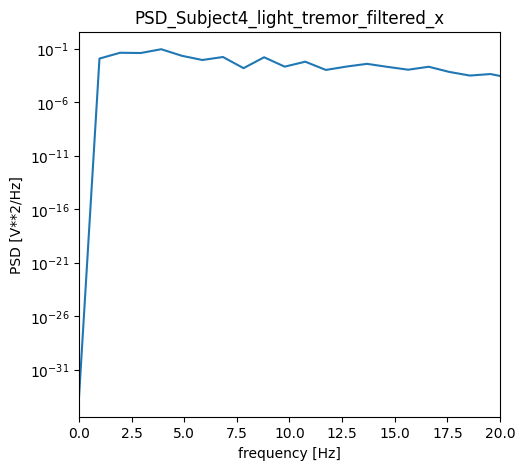

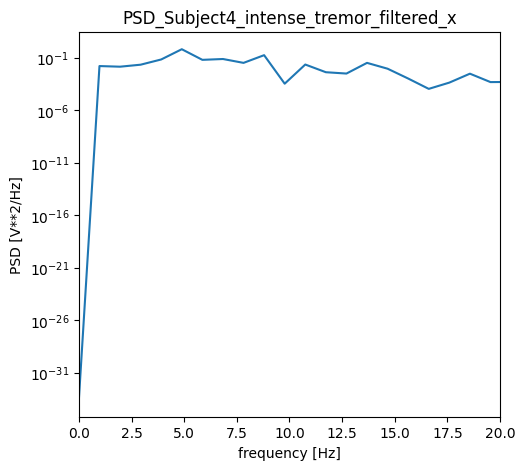

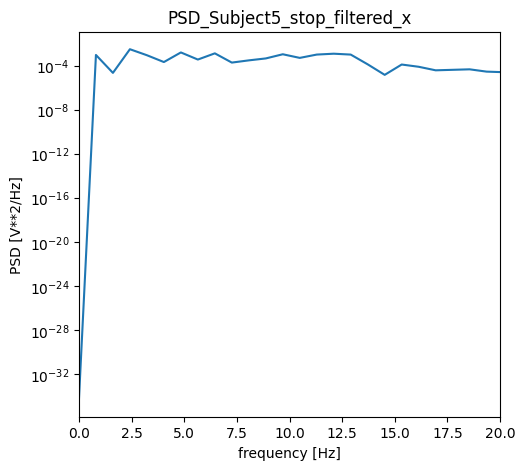

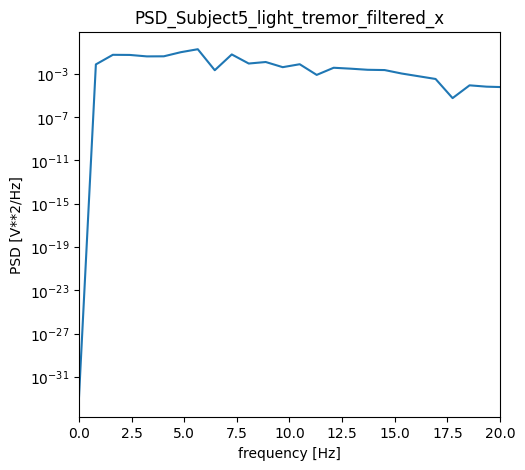

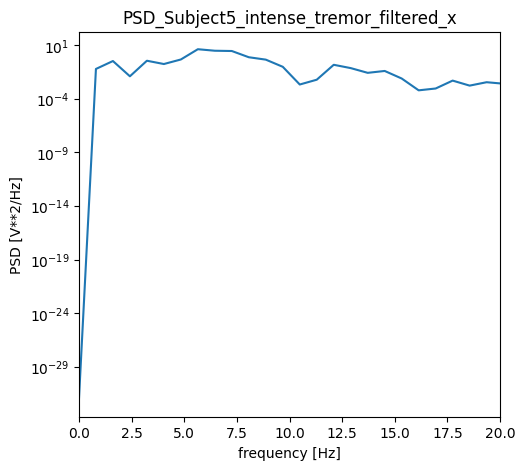

In [22]:
for n in range(5):
 subject = 'Subject'+str(n+1)
 for i,j in signals[subject].items():
  for k,l,m in zip(j.keys(),j.values(),range(5)):
    if k=='Acceleration_x_(m/s^2)':
      PSD_generate_img_filtered(l,'PSD_'+subject+'_'+i+'_filtered_x',m,fs[n])